## Proyecto Integrador

In [1]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Avance 1

Cargamos el archivo (puede demorar algunos minutos)

In [5]:
data = pd.read_csv("data_latinoamerica.csv",sep=',', chunksize=100000)

In [6]:
data

In [7]:
np.shape(data)

()

Siguiendo con lo solicitado por el área de ingeniería de datos y el objetivo del proyecto nos podemos enfocar en los 6 países que se han propuesto para el análisis. 

In [7]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica=data[data['country_name'].isin(paises_seleccionados)]

Por ahora vemos que tenemos esta cantidad de instancias, siendo esto una cantidad considerable de datos para trabajar.

In [8]:
np.shape(data_latinoamerica)

(11970289, 50)

Nos podemos preguntar que tan buena es la calidad de nuestros datos, esto lo hubieramos podrido hacer en el paso anterior, pero por ahora lo haremos en este paso.
Verificaremos la cantidad de datos faltantes por columna y si es necesario haremos una limpieza de los datos donde se presenten valores mayores a 4 millones de datos faltantes.

In [9]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


Despues de haber hecho un análisis de la calidad de los datos, podemos ver que tenemos datos faltantes en muchas columnas, por lo que despues realizaremos un nuevo filtro por la columna "Location_key"  pero solo vamos a ustilizar las instancias que correspondan a los países que hemos seleccionado y no a sus regiones o subregiones AR, CL, CO, MX, PE, BR.

In [10]:
data_latinoamerica_paises=data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

Para facilidad y comprensiòn de los datos, vamos a tomar los datos a partir de la fecha 2021-01-01, ya que es la fecha en la que se empezaron a registrar mejor los datos.

In [11]:

data_latinoamerica_paises_Fecha=data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

Con el nuevo filtro vamos a ver que cantidad de elementos tenemos vacios, en caso de tenerlos, debemos proceder a eliminarlos.

In [12]:
#contamos valores nulos
valores_nulos_fecha=data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0]
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_Fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [13]:
# usar un for para completar los valores nulos de las columnas de la media de cada país.
for pais in paises_seleccionados:
    data_latinoamerica_paises_Fecha['new_confirmed']=data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_confirmed'].mean())
    data_latinoamerica_paises_Fecha['new_deceased']=data_latinoamerica_paises_Fecha['new_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_deceased'].mean())
    #data_latinoamerica_paises_Fecha['new_recovered']=data_latinoamerica_paises_Fecha['new_recovered'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_recovered'].mean())
    data_latinoamerica_paises_Fecha['cumulative_confirmed']=data_latinoamerica_paises_Fecha['cumulative_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_confirmed'].mean())
    data_latinoamerica_paises_Fecha['cumulative_deceased']=data_latinoamerica_paises_Fecha['cumulative_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_deceased'].mean())
    #data_latinoamerica_paises_Fecha['cumulative_recovered']=data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_recovered'].mean())
    data_latinoamerica_paises_Fecha['rainfall_mm']=data_latinoamerica_paises_Fecha['rainfall_mm'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['rainfall_mm'].mean())
    data_latinoamerica_paises_Fecha['relative_humidity']=data_latinoamerica_paises_Fecha['relative_humidity'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['relative_humidity'].mean())
    data_latinoamerica_paises_Fecha['average_temperature_celsius']=data_latinoamerica_paises_Fecha['average_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['average_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['minimum_temperature_celsius']=data_latinoamerica_paises_Fecha['minimum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['maximum_temperature_celsius']=data_latinoamerica_paises_Fecha['maximum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['maximum_temperature_celsius'].mean())

# Llenar Nan con el valore de 0 en la columna new_recovered,cumulative_recovered,cumulative_vaccine_doses_administered para hacer analisis de estos datos.
data_latinoamerica_paises_Fecha['new_recovered']=data_latinoamerica_paises_Fecha['new_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_recovered']=data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered']=data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'].fillna(0)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17752\1160981752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_confirmed']=data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_confirmed'].mean())
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17752\1160981752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_deceased']=data_latinoameric

Esta sería otra forma de rellenar los datos faltantes, pero en este caso no lo haremos. (Lo dejamos comentado para que se vea la opción)

In [14]:
# Podemos llenar los valores nulos con la media de cada país usando groupby,transform y lambda.
    
# data_latinoamerica_paises_Fecha['new_confirmed1']=data_latinoamerica_paises_Fecha.groupby('country_name')['new_confirmed'].transform(lambda x: x.fillna(x.mean()))
# data_latinoamerica_paises_Fecha['new_deceased1']=data_latinoamerica_paises_Fecha.groupby('country_name')['new_deceased'].transform(lambda x: x.fillna(x.mean()))
# data_latinoamerica_paises_Fecha['new_recovered1']=data_latinoamerica_paises_Fecha.groupby('country_name')['new_recovered'].transform(lambda x: x.fillna(x.mean()))
# data_latinoamerica_paises_Fecha['cumulative_confirmed1']=data_latinoamerica_paises_Fecha.groupby('country_name')['cumulative_confirmed'].transform(lambda x: x.fillna(x.mean()))
# data_latinoamerica_paises_Fecha['cumulative_deceased1']=data_latinoamerica_paises_Fecha.groupby('country_name')['cumulative_deceased'].transform(lambda x: x.fillna(x.mean()))
# data_latinoamerica_paises_Fecha['cumulative_recovered1']=data_latinoamerica_paises_Fecha.groupby('country_name')['cumulative_recovered'].transform(lambda x: x.fillna(x.mean()))
# data_latinoamerica_paises_Fecha['rainfall_mm1']=data_latinoamerica_paises_Fecha.groupby('country_name')['rainfall_mm'].transform(lambda x: x.fillna(x.mean()))
# data_latinoamerica_paises_Fecha['relative_humidity1']=data_latinoamerica_paises_Fecha.groupby('country_name')['relative_humidity'].transform(lambda x: x.fillna(x.mean()))
# data_latinoamerica_paises_Fecha['average_temperature_celsius1']=data_latinoamerica_paises_Fecha.groupby('country_name')['average_temperature_celsius'].transform(lambda x: x.fillna(x.mean()))
# data_latinoamerica_paises_Fecha['minimum_temperature_celsius1']=data_latinoamerica_paises_Fecha.groupby('country_name')['minimum_temperature_celsius'].transform(lambda x: x.fillna(x.mean()))
# data_latinoamerica_paises_Fecha['maximum_temperature_celsius1']=data_latinoamerica_paises_Fecha.groupby('country_name')['maximum_temperature_celsius'].transform(lambda x: x.fillna(x.mean()))


Nuevamente verificamos la cantidad de instancias vacias y las dimensiones del nuevo dataset.

In [15]:
print(data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_Fecha))

Series([], dtype: int64)
(3744, 50)


Guardamos el dataset filtrado por fecha en un archivo csv para poderlo utilizar en el analisis y que no sea necesario cargar el archivo original, recordemos que ahora con las nuevas dimensiones del dataset, el archivo es más pequeño y mas fácil de manejar.

In [16]:
data_latinoamerica_paises_Fecha.to_csv("DatosFinalesFiltrado.csv",index=False)

Podemos reiniciar el notebook para liberar memoria y cargar el archivo filtrado para continuar con el análisis.

In [37]:
data_latinoamerica_paises=pd.read_csv("DatosFinalesFiltrado.csv",sep=',')

In [29]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('---------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
---------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
---------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
---------------------------------
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.00

La anterior exploración también podríamos realizarla mediante un bucle while.

In [30]:
#hacer con while.
i=0
while i<len(data_latinoamerica_paises.columns):
    print(data_latinoamerica_paises.columns[i])
    print(data_latinoamerica_paises[data_latinoamerica_paises.columns[i]].describe())
    print('---------------------------------')
    i+=1

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
---------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
---------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
---------------------------------
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.00

Como complemento extra vamos a crear una función que nos entregue valores que el metodo describe no nos entrega, como la moda, mediana, el Rango, la varianza.

In [38]:
# crea un funcion  que solo muestre los valores numericos y no los valores categoricos, ademas solo da la media,median y la desviacion estandar.
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(i)
            print('Mediana:',data[i].median())
            print('varianza:',data[i].var())
            print('Rango', data[i].max()-data[i].min())
            print("Moda",data[i].mode())
            print('---------------------------------')

describir_datos(data_latinoamerica_paises)

new_confirmed
Mediana: 5227.0
varianza: 585908652.8478458
Rango 298981.0
Moda 0    0.0
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
Mediana: 101.0
varianza: 257184.0754690855
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64
---------------------------------
cumulative_confirmed
Mediana: 3648782.0
varianza: 63637740447227.74
Rango 34567862.0
Moda 0    6.079579e+06
Name: cumulative_confirmed, dtype: float64
---------------------------------
cumulative_deceased
Mediana: 139496.5
varianza: 33351870288.323883
Rango 685202.0
Moda 0    105716.119355
Name: cumulative_deceased, dtype: float64
---------------------------------
cumulative_vaccine_doses_administered
Mediana: 32445756.5
varianza: 8551958275078892.0
Rango 347868481.0
Moda 0    0.0
Name: cumulative_vaccine_doses_administered, dtype: float64
---------------------------------
population
Mediana: 47910798.0
varianza: 4507478439615793.0
Rango 194985406.0
Moda 0     17574003.0
1     2938

## Avance 2

Acercamiento a las estadísticas básicas de los datos. 
Usamos un ciclo for para recorrer las columnas y obtener la media, mediana, desviación estandar, mínimo y máximo de cada columna.

In [32]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('---------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
---------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
---------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
---------------------------------
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.00

In [39]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

Ponemos como indice la columna "Date" para poder hacer un análisis de los datos a lo largo del tiempo.

In [40]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [46]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises_Fecha = data_latinoamerica_paises.set_index('date', inplace=False)
#data_latinoamerica_paises_Fecha

In [49]:
data_latinoamerica_paises.head()

location_key       date country_code country_name  new_confirmed  \
0           AR 2021-01-02           AR    Argentina         7767.0   
1           AR 2021-01-03           AR    Argentina         4934.0   
2           AR 2021-01-04           AR    Argentina        13953.0   
3           AR 2021-01-05           AR    Argentina        14085.0   
4           AR 2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

In [50]:
data_latinoamerica_paises_Fecha.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0                   0.0  
2021-01-03                        15.8            0.0                   0.0  
2021-01-04                        15.8            0.0                   0.0  
2021-01-05                        15.8            0.0                   0.0  
2021-01-06                        15.8            0.0                   0.0  

[5 rows x 49 columns]

Un primer acercamiento será realizar una matriz de correlación para ver si existe alguna relación entre las variables para tener en cuenta para un análisis posterior.

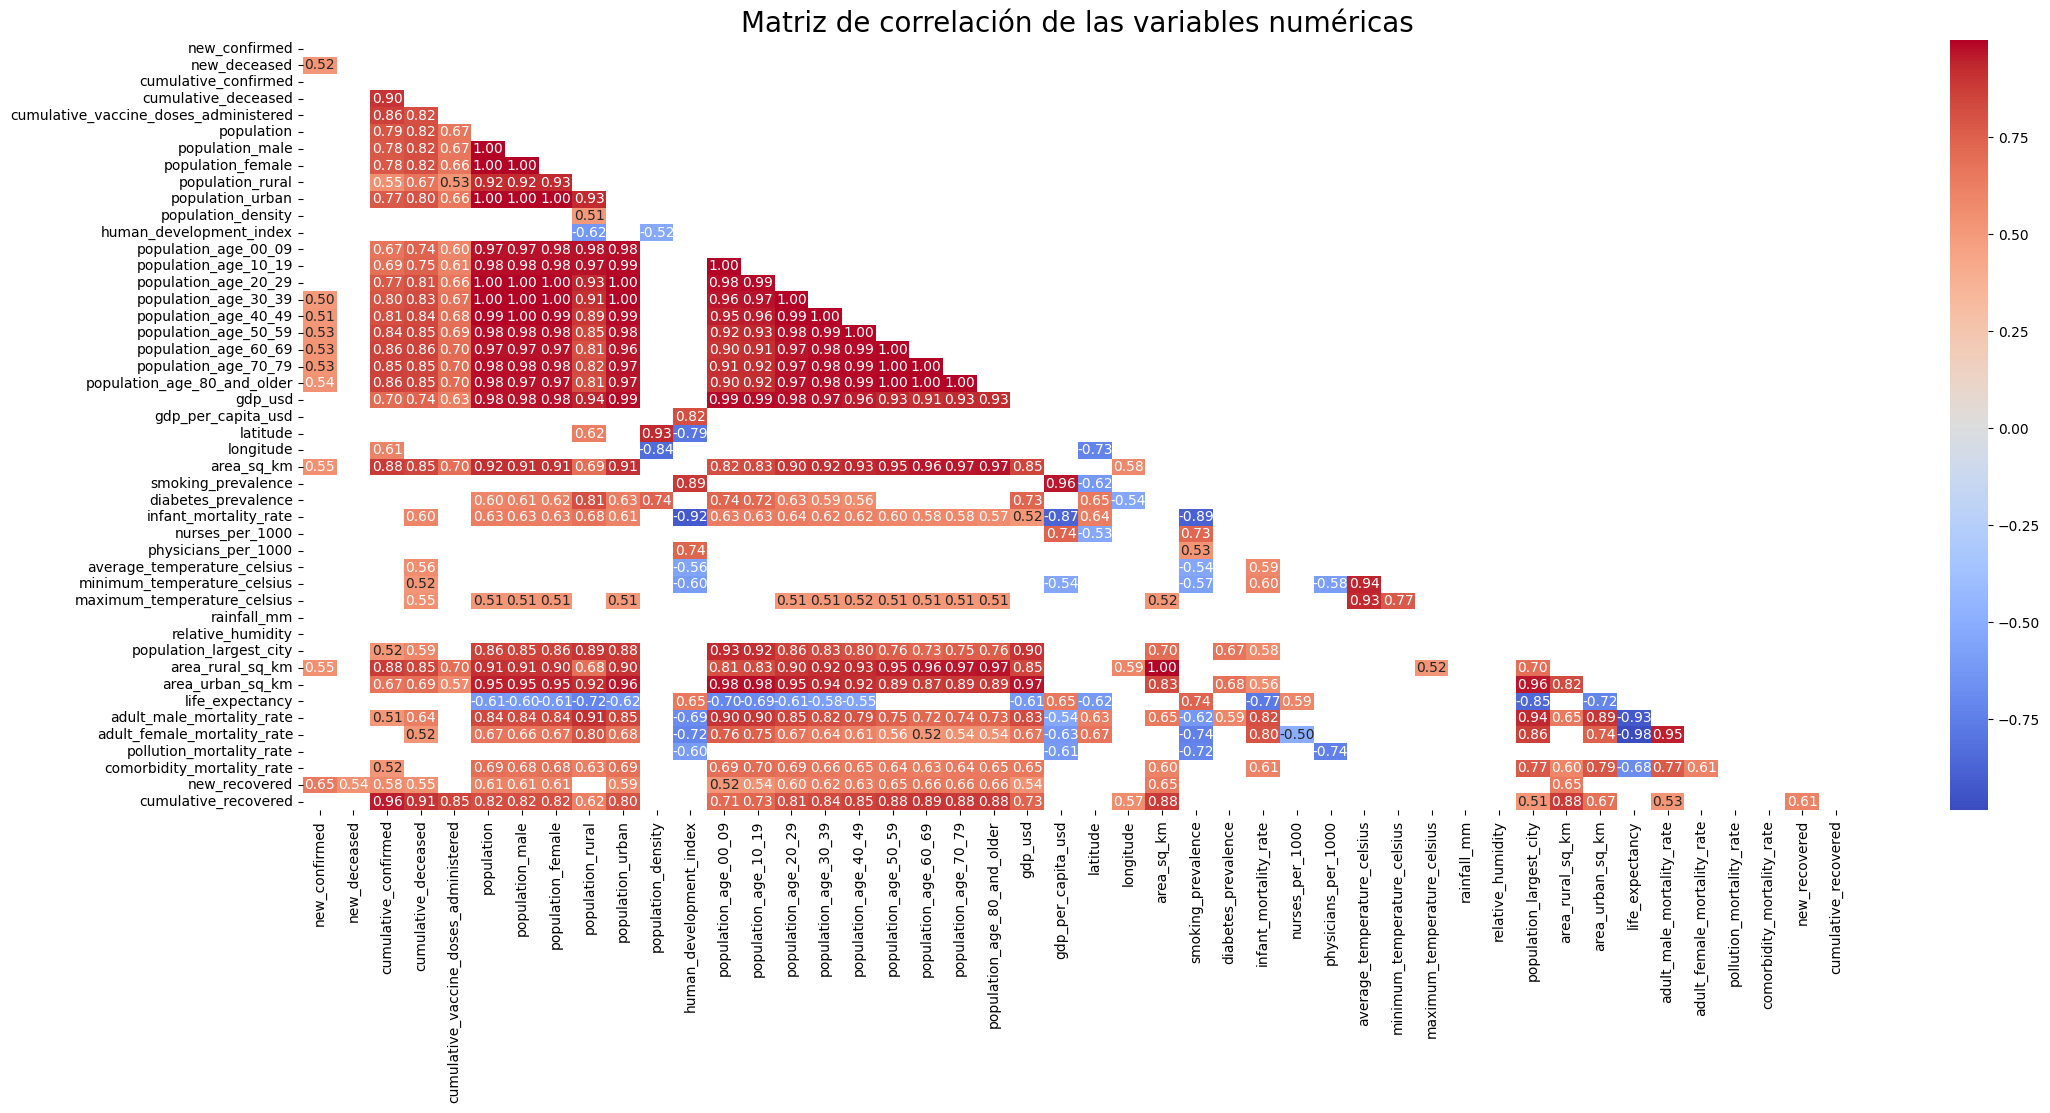

In [51]:
#Se crea la matriz de correlación de las variables numéricas
numeric_columns = data_latinoamerica_paises.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr()
#Aquí se crea máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Vamos a mostrar valores superiores a 0.5 es decur donde hay una correlación fuerte sin embargo tambien se puede mostrar valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

En la gráfica anterior se presentan Las variables con mayor correlación, para identificarlas más rápido, se definió un umbral cuyo valor absoluto sea mayor a 0.5 y se graficaron en un heatmap.

Ya teniendo una idea de las variables que tienen mayor correlación, podría hacer un análisis más detallado de estas variables esto se podría hacer en un análisis posterior y una toma de decisiones para la creación de un modelo ML.

Sin embargo podemos proceder a realizar una rápida revisión gráfica de la gran mayoría de las columnas para ver como se comportan los datos, para esta primera aproximación vamos a utilizar barplots utilizando un ciclo for y la librería seaborn.

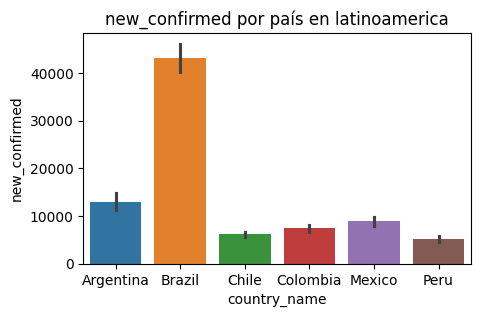

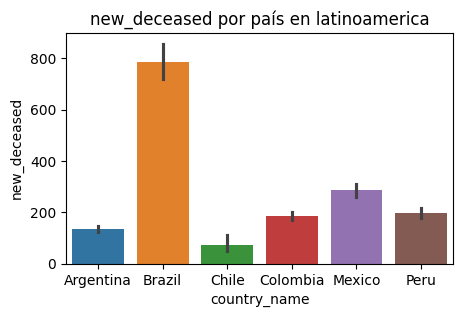

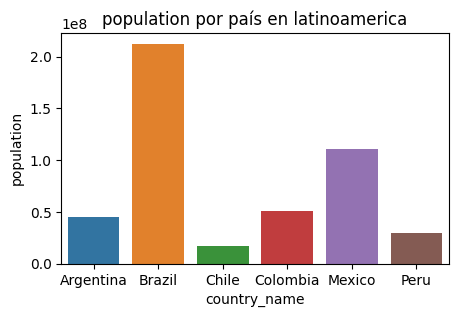

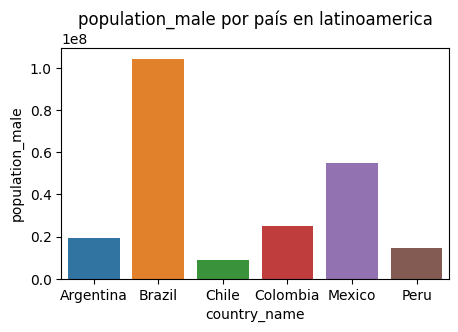

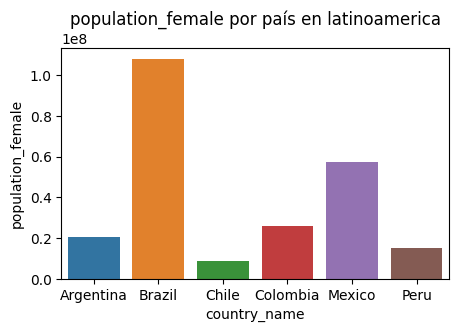

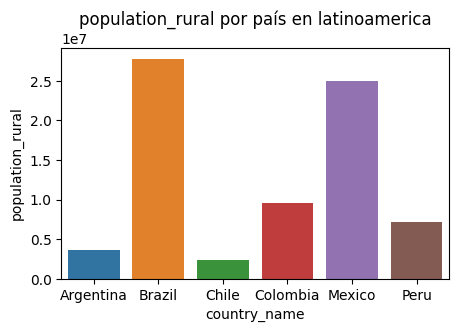

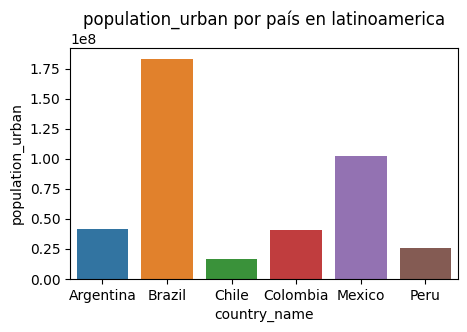

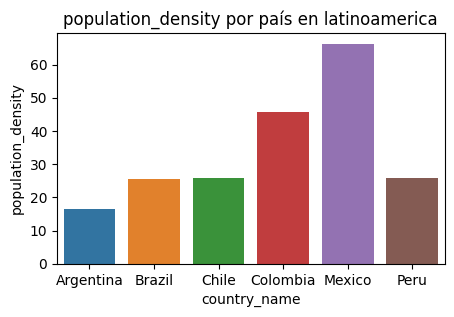

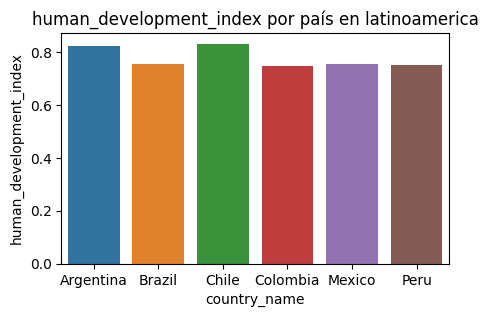

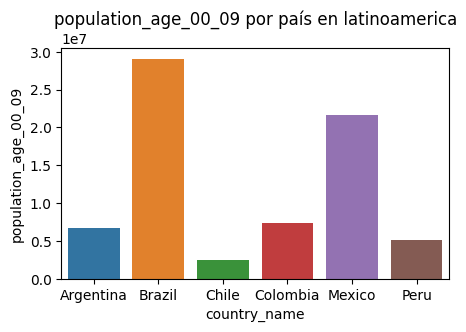

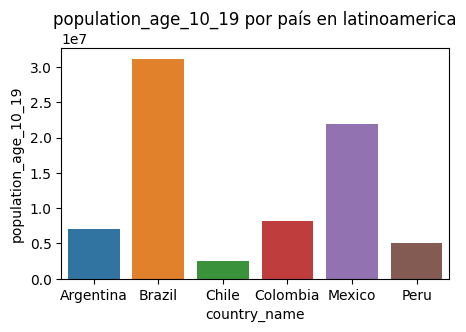

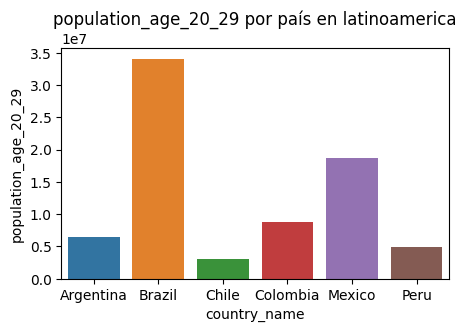

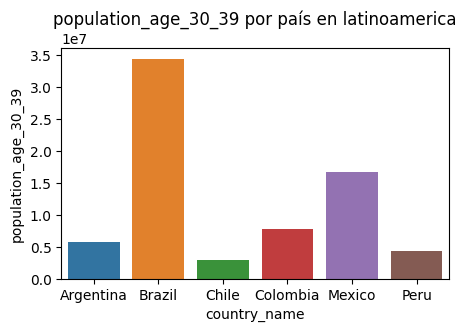

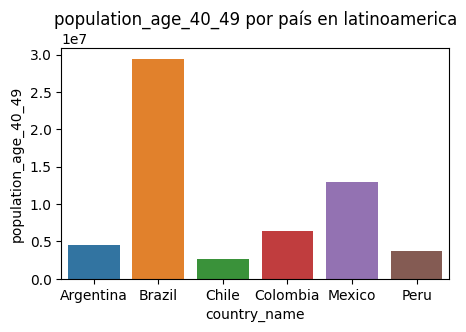

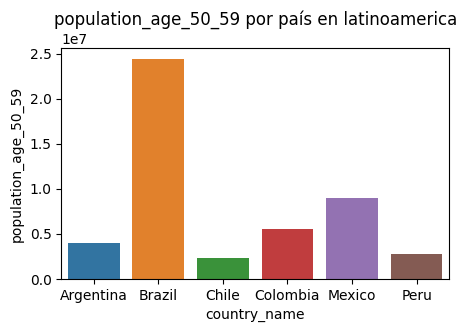

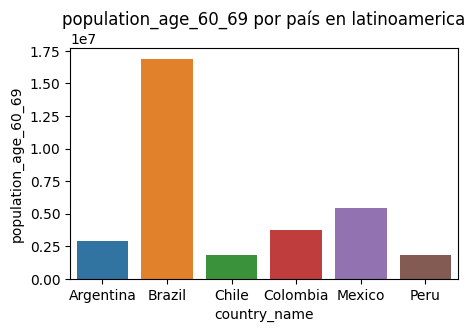

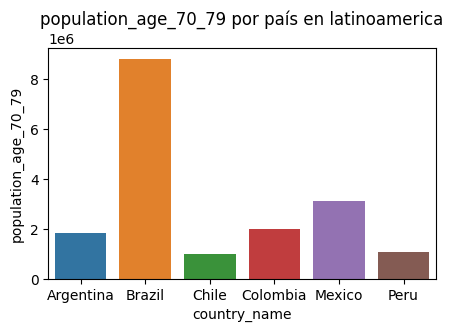

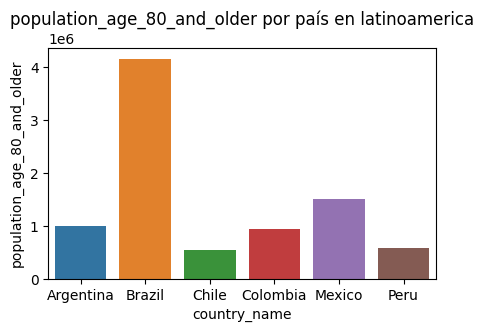

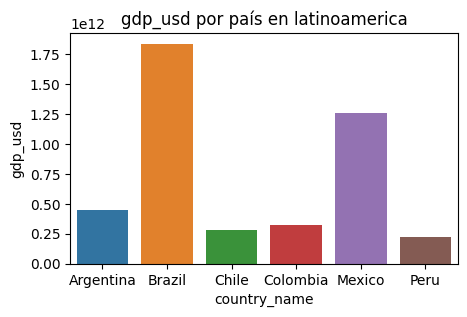

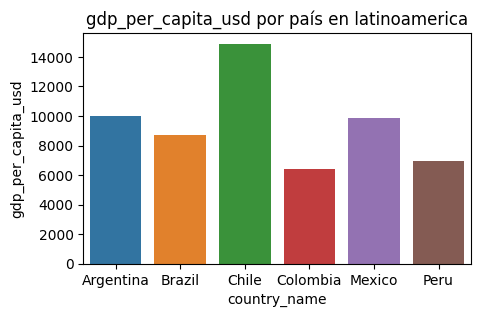

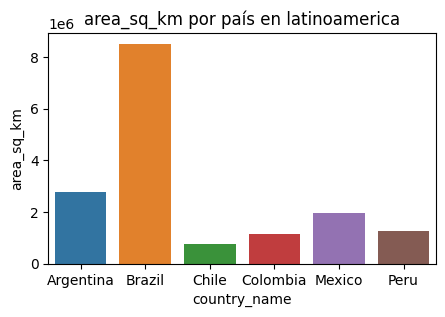

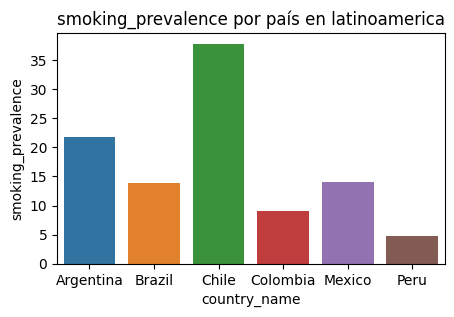

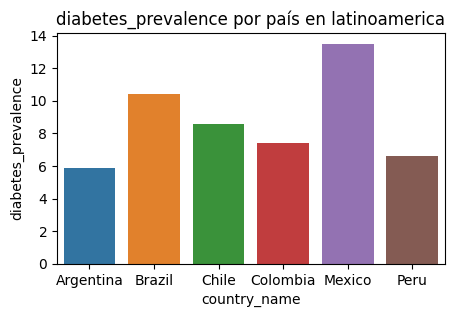

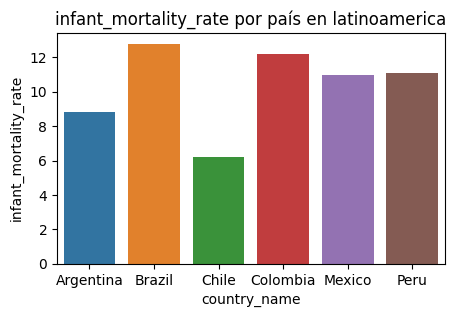

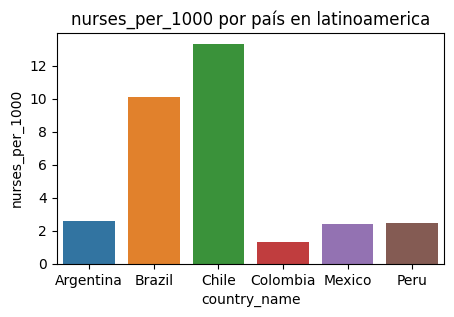

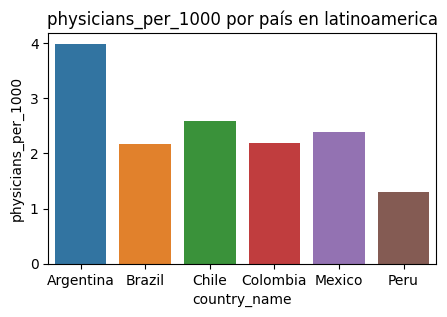

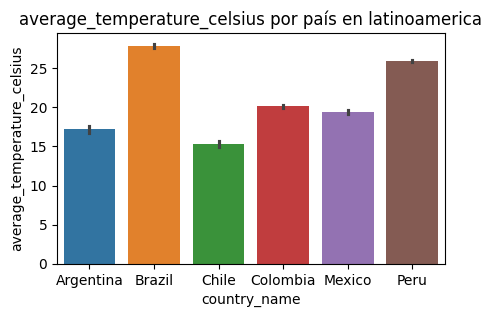

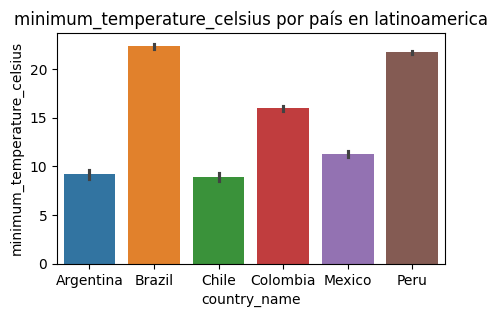

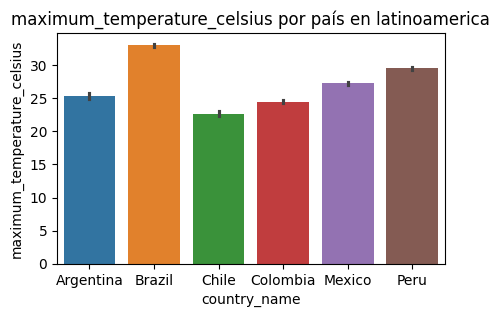

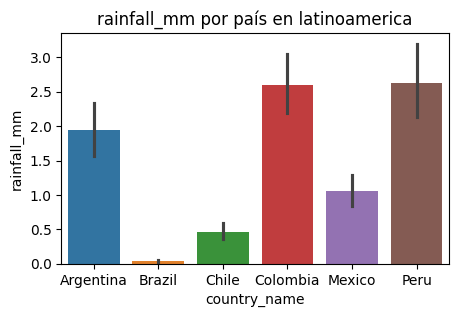

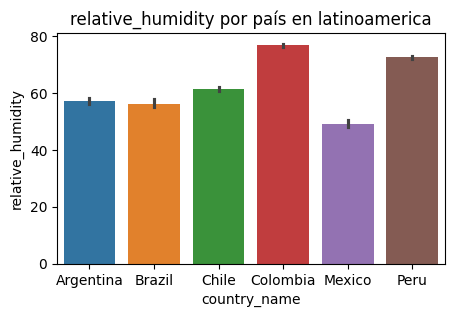

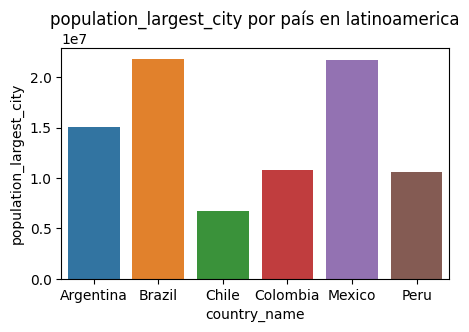

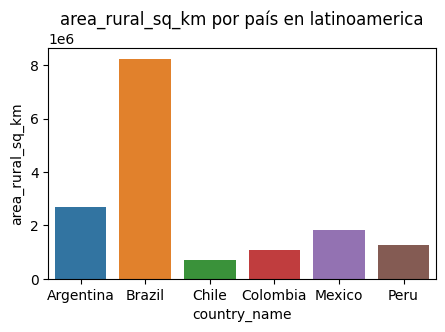

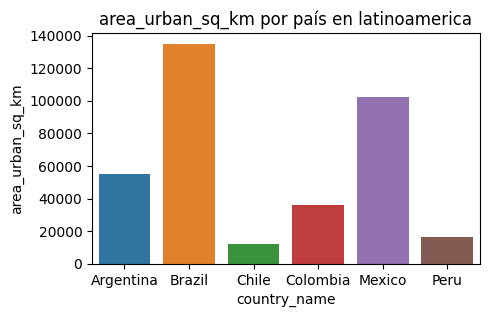

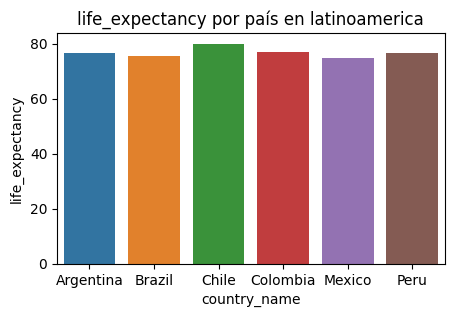

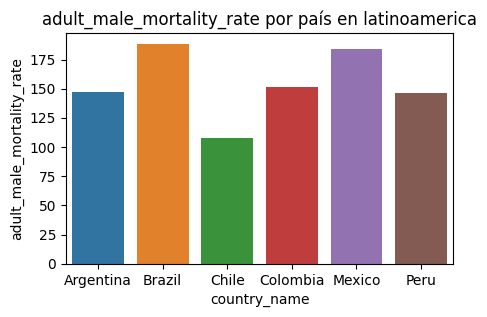

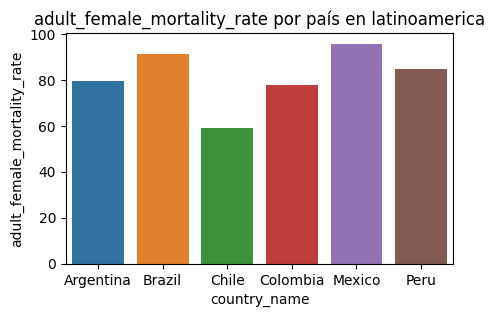

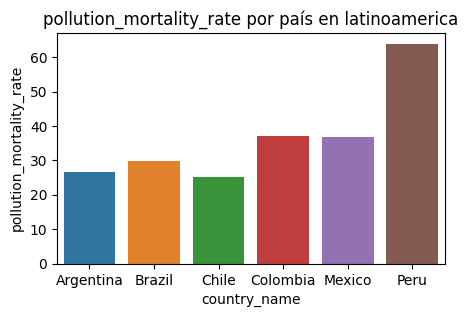

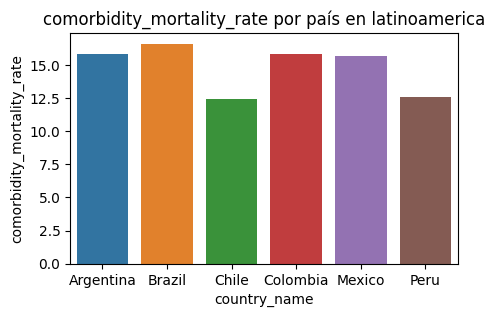

In [16]:
# diagrams bar for evere country in data_latinoamerica_paises with 6 columns 
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered','new_recovered']:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_paises, ax=ax,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()


Se repite el proceso con un ciclo for pero ahora vamos a realizar histogramas para ver la distribución de algunos de los datos.

In [26]:
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-13       14450757.0  ...               10554712.0         1256339.0   
2022-09-14       14450757.0  ...               10554712.0         1256339.0   
2022-09-15       14450757.0  ...               10554712.0         1256339.0   
2022-09-16       14450757.0  ...               10554712.0         1256339.0   
2022-09-17       14450757.0  ...               10554712.0         1256339.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0           76.520                    147.086   
2021-01-03           55032.0           76.520                    147.086   
2021-01-04           550

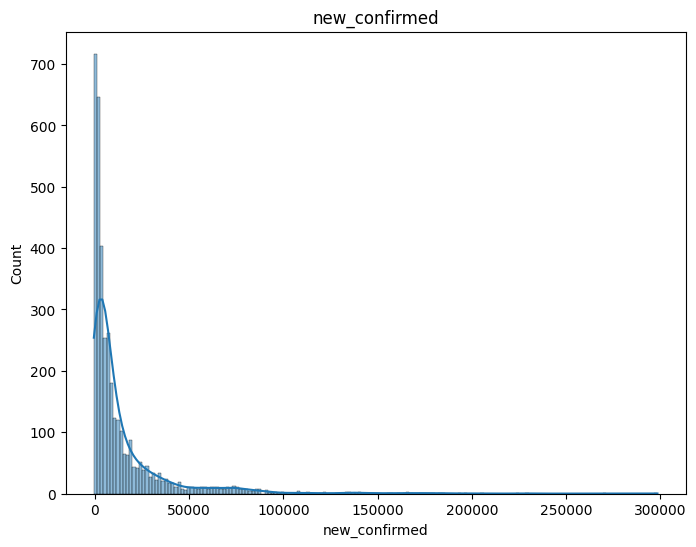

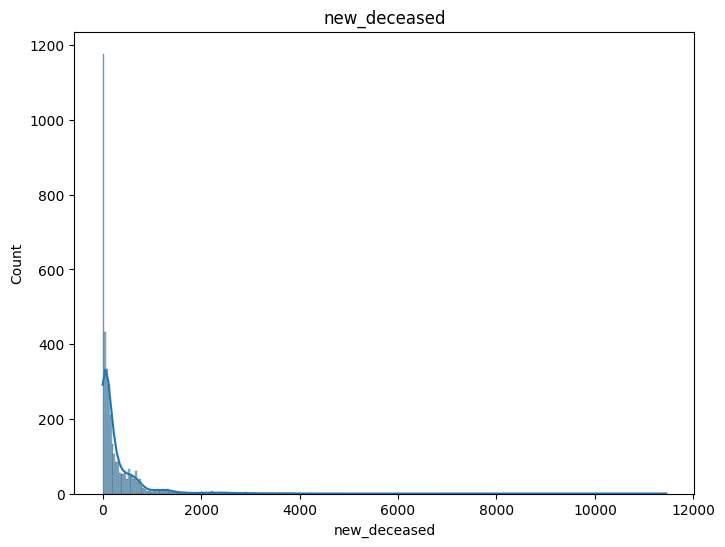

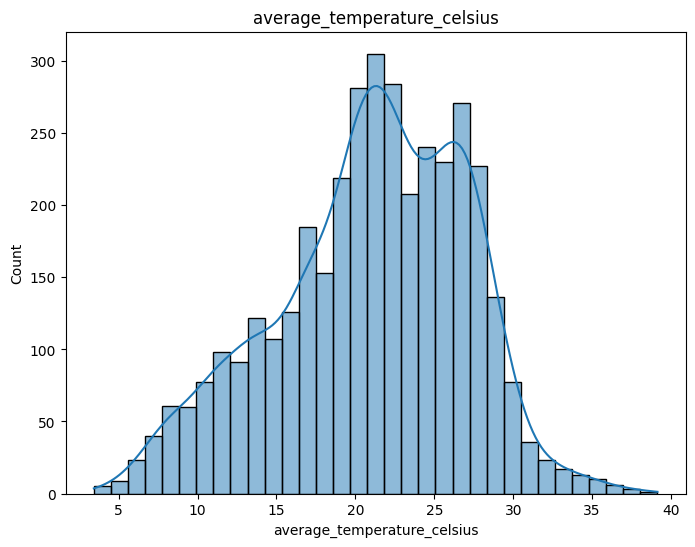

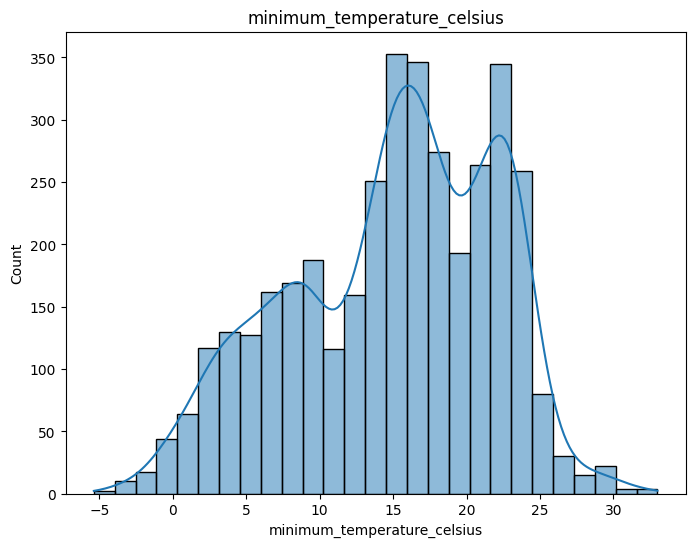

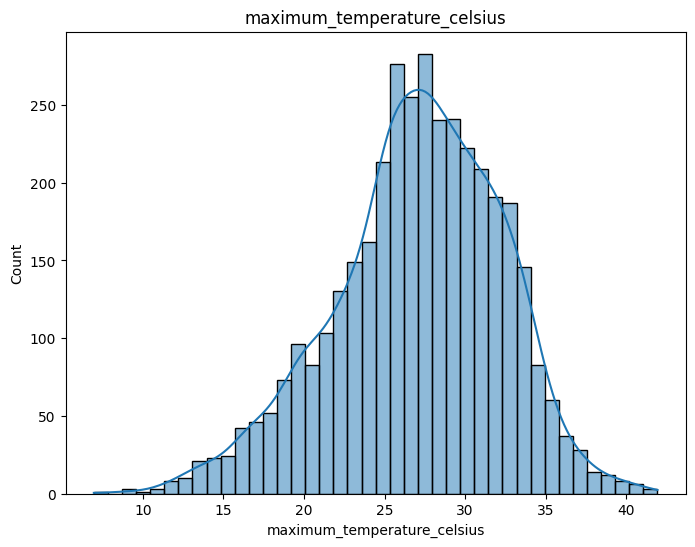

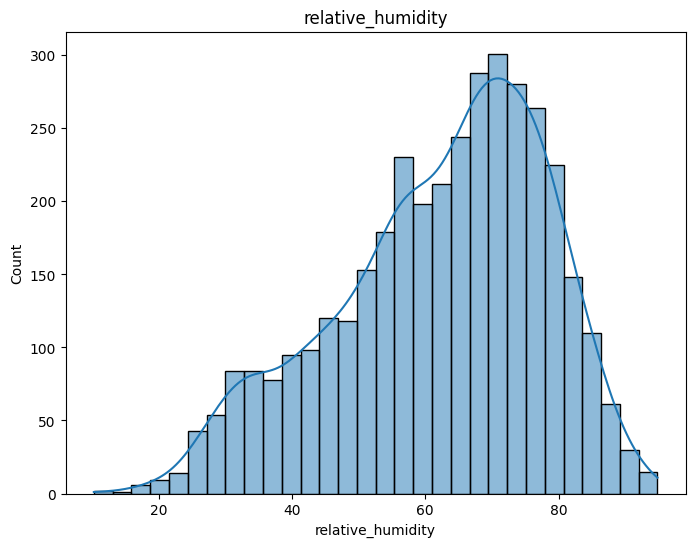

In [ ]:
lista_columnas_6=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased", 
                  "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                  "maximum_temperature_celsius","relative_humidity"]
# Crear histogramas de las variables numéricas
for i in data_latinoamerica_paises[lista_columnas_6]:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered']:
        fig, ax = plt.subplots(figsize=(8,6))
        sns.histplot(data_latinoamerica_paises[i], kde=True)
        plt.title(i)
        plt.show()

Procederemos a realizar un analisis enfocados en algunas variables especficicas, en este caso vamos a analizar la variable average_temperature y la variable new_confirmed, con el fin de tratar de entender el comportamiento de los casos respecto a la temperatura.

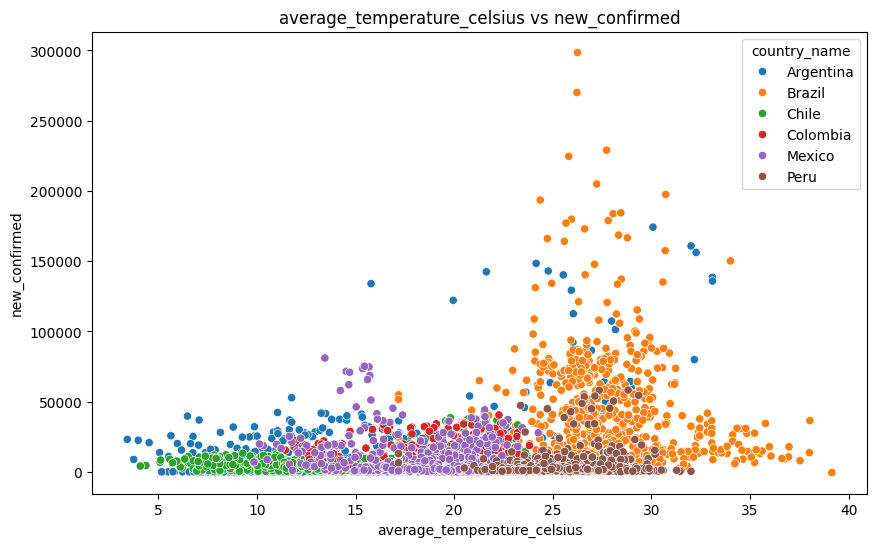

In [18]:
# Grafica de average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()

Se ha podido observar que en algunos paises la temperatura no influye en la cantidad de casos confirmados, sin embargo en otros paises si se puede observar una relación entre la temperatura y la cantidad de casos confirmados.

Como vimos que la temperatura tiene alguna relación con los casos confirmados, vamos a realizar un análisis de la temperatura promedio con la cantidad de muertes.

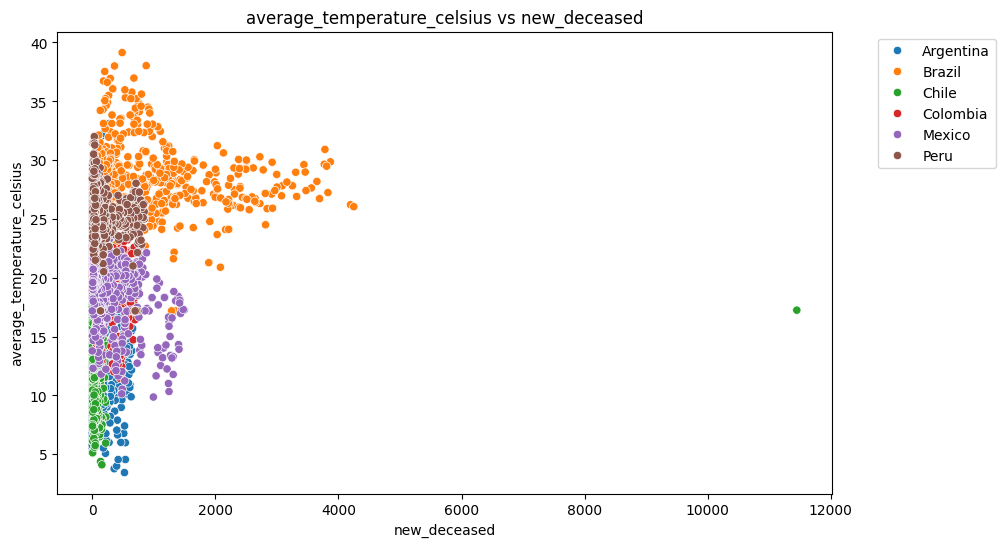

In [19]:
# Grafica de average_temperature_celsius vs new_deceased
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

En la grafica anterior se ve un comportamiento similar al de los casos confirmados, en algunos paises la temperatura no influye en la cantidad de muertes, sin embargo en otros paises si se puede observar una relación entre la temperatura y la cantidad de muertes.

Ahora si veamos como se comportan las variables en un estudio longitudinal, es decir a lo largo del tiempo.

Por lo tanto, se hace una primera aproximación y observaremos las dosis administradas por mes en todos los países.

In [56]:

data_latinoamerica_paises.head(365
                               )

location_key       date country_code country_name  new_confirmed  \
0             AR 2021-01-02           AR    Argentina         7767.0   
1             AR 2021-01-03           AR    Argentina         4934.0   
2             AR 2021-01-04           AR    Argentina        13953.0   
3             AR 2021-01-05           AR    Argentina        14085.0   
4             AR 2021-01-06           AR    Argentina        14496.0   
..           ...        ...          ...          ...            ...   
360           AR 2021-12-28           AR    Argentina        50210.0   
361           AR 2021-12-29           AR    Argentina        59867.0   
362           AR 2021-12-30           AR    Argentina        64004.0   
363           AR 2021-12-31           AR    Argentina        46406.0   
364           AR 2022-01-01           AR    Argentina        20922.0   

     new_deceased  cumulative_confirmed  cumulative_deceased  \
0           166.0             1670634.0              46688.0   
1           157.0             1675568.0              46845.0   
2           157.0             1689521.0              47002.0   
3           160.0             1703606.0              47162.0   
4           131.0             1718102.0              47293.0   
..            ...                   ...                  ...   
360          35.0             5597134.0             117518.0   
361          33.0             5657001.0             117551.0   
362          45.0             5721005.0             117596.0   
363          26.0             5767411.0             117622.0   
364          34.0             5788333.0             117656.0   

     cumulative_vaccine_doses_administered  population  ...  \
0                                  20334.0  44938712.0  ...   
1                                  20529.0  44938712.0  ...   
2                                  25164.0  44938712.0  ...   
3                                  29852.0  44938712.0  ...   
4                                  34162.0  44938712.0  ...   
..                                     ...         ...  ...   
360                             30769238.0  44938712.0  ...   
361                             30856143.0  44938712.0  ...   
362                             30927440.0  44938712.0  ...   
363                             30932811.0  44938712.0  ...   
364                             30933414.0  44938712.0  ...   

     population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                 15057273.0         2690269.0           55032.0   
1                 15057273.0         2690269.0           55032.0   
2                 15057273.0         2690269.0           55032.0   
3                 15057273.0         2690269.0           55032.0   
4                 15057273.0         2690269.0           55032.0   
..                       ...               ...               ...   
360               15057273.0         2690269.0           55032.0   
361               15057273.0         2690269.0           55032.0   
362               15057273.0         2690269.0           55032.0   
363               15057273.0         2690269.0           55032.0   
364               15057273.0         2690269.0           55032.0   

     life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.52                    147.086                       79.483   
1              76.52                    147.086                       79.483   
2              76.52                    147.086                       79.483   
3              76.52                    147.086                       79.483   
4              76.52                    147.086                       79.483   
..               ...                        ...                          ...   
360            76.52                    147.086                       79.483   
361            76.52                    147.086                       79.483   
362            76.52                    147.086                       79.483

In [68]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3744 non-null   object        
 1   date                                   3744 non-null   datetime64[ns]
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3744 non-null   float64       
 5   new_deceased                           3744 non-null   float64       
 6   cumulative_confirmed                   3744 non-null   float64       
 7   cumulative_deceased                    3744 non-null   float64       
 8   cumulative_vaccine_doses_administered  3744 non-null   float64       
 9   population                             3744 non-null   float64 

In [64]:
data_latinoamerica_paises_Fecha.resample('W').mean(numeric_only=True)

new_confirmed  new_deceased  cumulative_confirmed  \
date                                                            
2021-01-03    7467.000000    339.416667          2.384300e+06   
2021-01-10   17449.880952    491.404762          2.459657e+06   
2021-01-17   17716.023810    537.595238          2.582440e+06   
2021-01-24   16453.500000    597.476190          2.702934e+06   
2021-01-31   15402.714286    593.928571          2.814130e+06   
...                   ...           ...                   ...   
2022-08-21    6708.690476     51.500000          1.026049e+07   
2022-08-28    5321.071429     43.357143          1.030254e+07   
2022-09-04    3958.309524     38.523810          1.033486e+07   
2022-09-11    2800.119048     26.380952          1.035769e+07   
2022-09-18    8922.724866     90.915547          9.005658e+06   

            cumulative_deceased  cumulative_vaccine_doses_administered  \
date                                                                     
2021-01-03         92785.833333                           3.405250e+03   
2021-01-10         94898.380952                           1.861814e+04   
2021-01-17         98516.380952                           6.558526e+04   
2021-01-24        102539.833333                           1.808645e+05   
2021-01-31        106753.714286                           4.456308e+05   
...                         ...                                    ...   
2022-08-21        208643.952381                           1.069314e+08   
2022-08-28        208974.761905                           1.050758e+08   
2022-09-04        209257.523810                           1.052720e+08   
2022-09-11        209471.880952                           1.004052e+08   
2022-09-18        170256.764068                           5.049129e+07   

              population  population_male  population_female  \
date                                                           
2021-01-03  7.772147e+07       37870352.5         39271616.5   
2021-01-10  7.772147e+07       37870352.5         39271616.5   
2021-01-17  7.772147e+07       37870352.5         39271616.5   
2021-01-24  7.772147e+07       37870352.5         39271616.5   
2021-01-31  7.772147e+07       37870352.5         39271616.5   
...                  ...              ...                ...   
2022-08-21  7.772147e+07       37870352.5         39271616.5   
2022-08-28  7.772147e+07       37870352.5         39271616.5   
2022-09-04  7.772147e+07       37870352.5         39271616.5   
2022-09-11  7.772147e+07       37870352.5         39271616.5   
2022-09-18  7.772147e+07       37870352.5         39271616.5   

            population_rural  population_urban  ...  population_largest_city  \
date                                            ...                            
2021-01-03      1.255498e+07      6.833931e+07  ...               14438882.0   
2021-01-10      1.255498e+07      6.833931e+07  ...               14438882.0   
2021-01-17      1.255498e+07      6.833931e+07  ...               14438882.0   
2021-01-24      1.255498e+07      6.833931e+07  ...               14438882.0   
2021-01-31      1.255498e+07      6.833931e+07  ...               14438882.0   
...                      ...               ...  ...                      ...   
2022-08-21      1.255498e+07      6.833931e+07  ...               14438882.0   
2022-08-28      1.255498e+07      6.833931e+07  ...               14438882.0   
2022-09-04      1.255498e+07      6.833931e+07  ...               14438882.0   
2022-09-11      1.255498e+07      6.833931e+07  ...               14438882.0   
2022-09-18      1.255498e+07      6.833931e+07  ...               14438882.0   

            area_rural_sq_km  area_urban_sq_km  life_expectancy  \
date                                                              
2021-01-03         2636579.5           59502.5          76.8085   
2021-01-10         2636579.5           59502.5          76.8085   
2021-01-17         2636579.5           59502.5          76.80

In [72]:
# Crear columna nueva de semana a partir del df que tiene RangeIndex

data_latinoamerica_paises['dia_semana'] = data_latinoamerica_paises['date'].dt.day_of_week

In [76]:
data_latinoamerica_paises_Fecha.resample('W').mean(numeric_only=True)

new_confirmed  new_deceased  cumulative_confirmed  \
date                                                            
2021-01-03    7467.000000    339.416667          2.384300e+06   
2021-01-10   17449.880952    491.404762          2.459657e+06   
2021-01-17   17716.023810    537.595238          2.582440e+06   
2021-01-24   16453.500000    597.476190          2.702934e+06   
2021-01-31   15402.714286    593.928571          2.814130e+06   
...                   ...           ...                   ...   
2022-08-21    6708.690476     51.500000          1.026049e+07   
2022-08-28    5321.071429     43.357143          1.030254e+07   
2022-09-04    3958.309524     38.523810          1.033486e+07   
2022-09-11    2800.119048     26.380952          1.035769e+07   
2022-09-18    8922.724866     90.915547          9.005658e+06   

            cumulative_deceased  cumulative_vaccine_doses_administered  \
date                                                                     
2021-01-03         92785.833333                           3.405250e+03   
2021-01-10         94898.380952                           1.861814e+04   
2021-01-17         98516.380952                           6.558526e+04   
2021-01-24        102539.833333                           1.808645e+05   
2021-01-31        106753.714286                           4.456308e+05   
...                         ...                                    ...   
2022-08-21        208643.952381                           1.069314e+08   
2022-08-28        208974.761905                           1.050758e+08   
2022-09-04        209257.523810                           1.052720e+08   
2022-09-11        209471.880952                           1.004052e+08   
2022-09-18        170256.764068                           5.049129e+07   

              population  population_male  population_female  \
date                                                           
2021-01-03  7.772147e+07       37870352.5         39271616.5   
2021-01-10  7.772147e+07       37870352.5         39271616.5   
2021-01-17  7.772147e+07       37870352.5         39271616.5   
2021-01-24  7.772147e+07       37870352.5         39271616.5   
2021-01-31  7.772147e+07       37870352.5         39271616.5   
...                  ...              ...                ...   
2022-08-21  7.772147e+07       37870352.5         39271616.5   
2022-08-28  7.772147e+07       37870352.5         39271616.5   
2022-09-04  7.772147e+07       37870352.5         39271616.5   
2022-09-11  7.772147e+07       37870352.5         39271616.5   
2022-09-18  7.772147e+07       37870352.5         39271616.5   

            population_rural  population_urban  ...  population_largest_city  \
date                                            ...                            
2021-01-03      1.255498e+07      6.833931e+07  ...               14438882.0   
2021-01-10      1.255498e+07      6.833931e+07  ...               14438882.0   
2021-01-17      1.255498e+07      6.833931e+07  ...               14438882.0   
2021-01-24      1.255498e+07      6.833931e+07  ...               14438882.0   
2021-01-31      1.255498e+07      6.833931e+07  ...               14438882.0   
...                      ...               ...  ...                      ...   
2022-08-21      1.255498e+07      6.833931e+07  ...               14438882.0   
2022-08-28      1.255498e+07      6.833931e+07  ...               14438882.0   
2022-09-04      1.255498e+07      6.833931e+07  ...               14438882.0   
2022-09-11      1.255498e+07      6.833931e+07  ...               14438882.0   
2022-09-18      1.255498e+07      6.833931e+07  ...               14438882.0   

            area_rural_sq_km  area_urban_sq_km  life_expectancy  \
date                                                              
2021-01-03         2636579.5           59502.5          76.8085   
2021-01-10         2636579.5           59502.5          76.8085   
2021-01-17         2636579.5           59502.5          76.80

In [80]:
data_latinoamerica_paises

location_key       date country_code country_name  new_confirmed  \
0              AR 2021-01-02           AR    Argentina    7767.000000   
1              AR 2021-01-03           AR    Argentina    4934.000000   
2              AR 2021-01-04           AR    Argentina   13953.000000   
3              AR 2021-01-05           AR    Argentina   14085.000000   
4              AR 2021-01-06           AR    Argentina   14496.000000   
...           ...        ...          ...          ...            ...   
3739           PE 2022-09-13           PE         Peru    1150.000000   
3740           PE 2022-09-14           PE         Peru   12911.385484   
3741           PE 2022-09-15           PE         Peru   12911.385484   
3742           PE 2022-09-16           PE         Peru   12911.385484   
3743           PE 2022-09-17           PE         Peru   12911.385484   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.000000          1.670634e+06         46688.000000   
1       157.000000          1.675568e+06         46845.000000   
2       157.000000          1.689521e+06         47002.000000   
3       160.000000          1.703606e+06         47162.000000   
4       131.000000          1.718102e+06         47293.000000   
...            ...                   ...                  ...   
3739     22.000000          4.127612e+06        216173.000000   
3740    134.379032          6.079579e+06        105716.119355   
3741    134.379032          6.079579e+06        105716.119355   
3742    134.379032          6.079579e+06        105716.119355   
3743    134.379032          6.079579e+06        105716.119355   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    0.0  29381884.0  ...   
3740                                    0.0  29381884.0  ...   
3741                                    0.0  29381884.0  ...   
3742                                    0.0  29381884.0  ...   
3743                                    0.0  29381884.0  ...   

      area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
0              55032.0           76.520                    147.086   
1              55032.0           76.520                    147.086   
2              55032.0           76.520                    147.086   
3              55032.0           76.520                    147.086   
4              55032.0           76.520                    147.086   
...                ...              ...                        ...   
3739           16425.0           76.516                    146.370   
3740           16425.0           76.516                    146.370   
3741           16425.0           76.516                    146.370   
3742           16425.0           76.516                    146.370   
3743           16425.0           76.516                    146.370   

      adult_female_mortality_rate  pollution_mortality_rate  \
0                          79.483                      26.6   
1                          79.483                      26.6   
2                          79.483                      26.6   
3                          79.483                      26.6   
4                          79.483                      26.6   
...                           ...                       ...   
3739                       84.815                      63.9   
3740                       84.815                      63.9   
3741                       84.815                      63.9   
3742                       84.815                      63.9   
3743                       84.815           

In [82]:
data_latinoamerica_paises.groupby('dia_semana').mean(numeric_only=True)

new_confirmed  new_deceased  cumulative_confirmed  \
dia_semana                                                      
0            11257.346442    233.395131          6.768948e+06   
1            15465.921348    302.290262          6.784451e+06   
2            16632.886783    305.017820          6.800305e+06   
3            16996.145931    313.104673          6.823035e+06   
4            16931.024931    297.135345          6.786528e+06   
5            12672.015394    276.294952          6.742517e+06   
6             7572.516854    207.305243          6.757644e+06   

            cumulative_deceased  cumulative_vaccine_doses_administered  \
dia_semana                                                               
0                 192647.481273                           6.633748e+07   
1                 192949.771536                           6.401891e+07   
2                 193018.448460                           6.578885e+07   
3                 193483.349432                           6.489247e+07   
4                 192693.793476                           6.950680e+07   
5                 191289.360585                           6.117795e+07   
6                 192458.149813                           6.643863e+07   

              population  population_male  population_female  \
dia_semana                                                     
0           7.772147e+07       37870352.5         39271616.5   
1           7.772147e+07       37870352.5         39271616.5   
2           7.772147e+07       37870352.5         39271616.5   
3           7.772147e+07       37870352.5         39271616.5   
4           7.772147e+07       37870352.5         39271616.5   
5           7.772147e+07       37870352.5         39271616.5   
6           7.772147e+07       37870352.5         39271616.5   

            population_rural  population_urban  ...  area_rural_sq_km  \
dia_semana                                      ...                     
0               1.255498e+07      6.833931e+07  ...         2636579.5   
1               1.255498e+07      6.833931e+07  ...         2636579.5   
2               1.255498e+07      6.833931e+07  ...         2636579.5   
3               1.255498e+07      6.833931e+07  ...         2636579.5   
4               1.255498e+07      6.833931e+07  ...         2636579.5   
5               1.255498e+07      6.833931e+07  ...         2636579.5   
6               1.255498e+07      6.833931e+07  ...         2636579.5   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
dia_semana                                                                 
0                    59502.5          76.8085                 154.274667   
1                    59502.5          76.8085                 154.274667   
2                    59502.5          76.8085                 154.274667   
3                    59502.5          76.8085                 154.274667   
4                    59502.5          76.8085                 154.274667   
5                    59502.5          76.8085                 154.274667   
6                    59502.5          76.8085                 154.274667   

            adult_female_mortality_rate  pollution_mortality_rate  \
dia_semana                                                          
0                                81.428                 36.566667   
1                                81.428                 36.566667   
2                                81.428                 36.566667   
3                                81.428                 36.566667   
4                                81.428                 36.566667   
5                                81.428                 36.566667   
6                                81.428                 36.566667   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  \
dia_semana                                                                    
0                            14.816667    7749.584270      

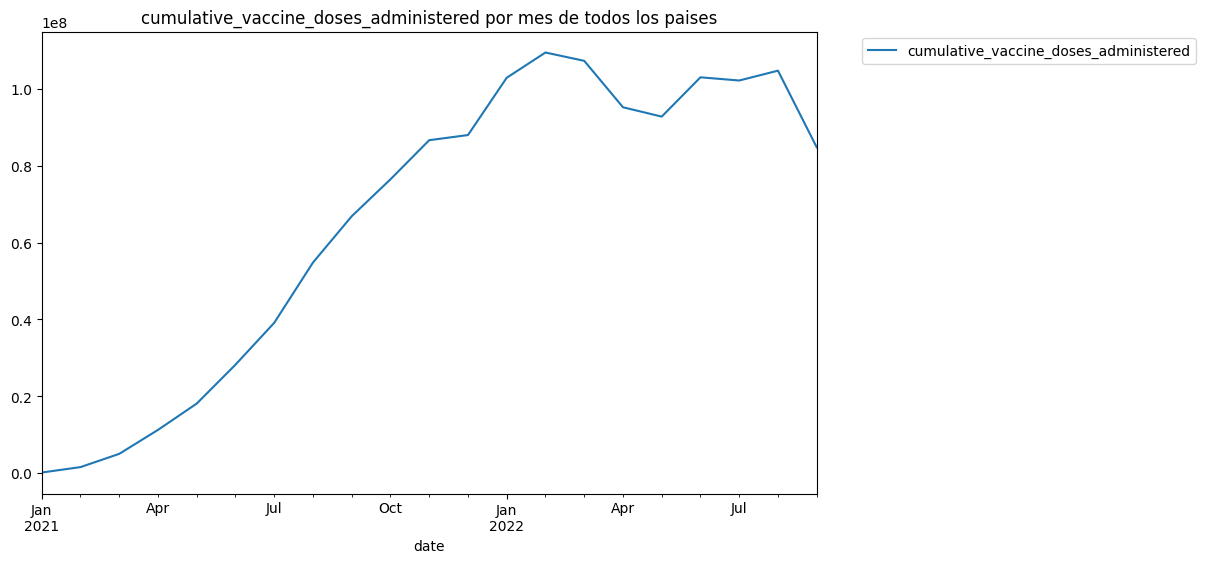

In [83]:
# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
data_latinoamerica_paises_Fecha.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes de todos los paises')
plt.show()

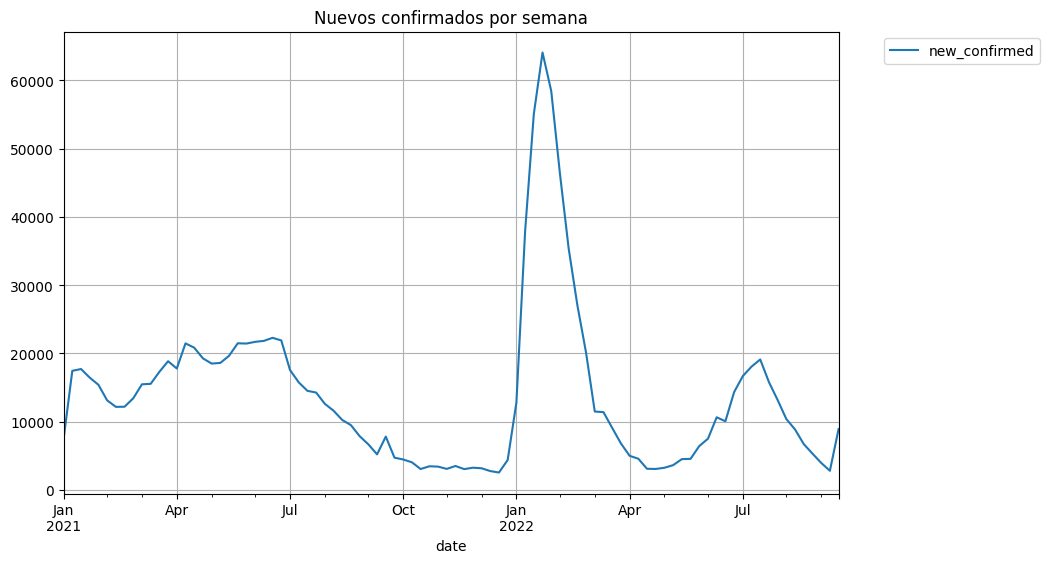

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
data_latinoamerica_paises_Fecha.resample('W').mean(numeric_only=True)['new_confirmed'].plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Nuevos confirmados por semana')
plt.grid()
plt.show()

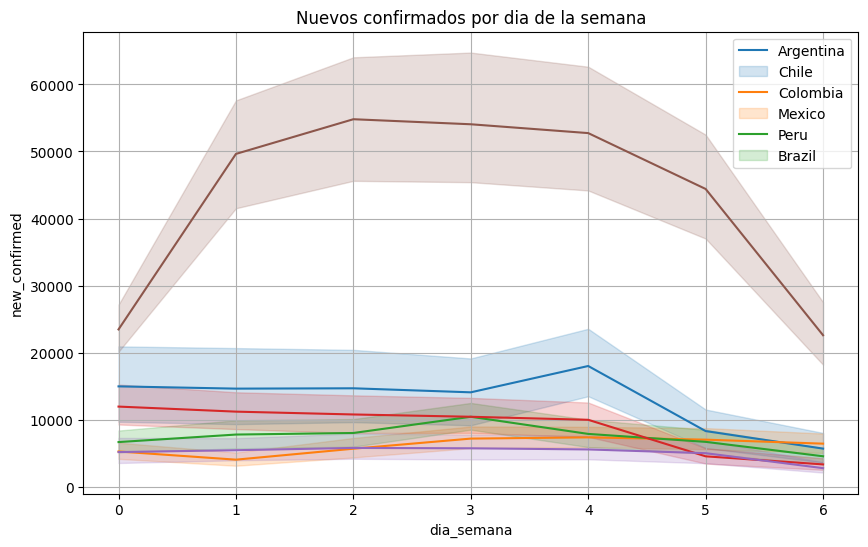

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in paises_seleccionados:
    
    sns.lineplot(data=data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == i], x='dia_semana', y='new_confirmed', ax=ax)

plt.legend(paises_seleccionados)
plt.title('Nuevos confirmados por dia de la semana')
plt.grid()
plt.show()

In [97]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs) -> 'Legend'
    Place a legend on the Axes.

    Call signatures::

        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)

    The call signatures correspond to the following different ways to use
    this method:

    **1. Automatic detection of elements to be shown in the legend**

    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.

    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::

        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()

    or::

        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()

    .. note::
        Specific artists can be excluded from the automatic legend element
        selectio

En la anterior gráfica se puede observar que la cantidad de dosis administradas en los países de Argentina, Brasil, Chile, Colombia, México y Perú ha ido aumentando a lo largo del tiempo, recordemos que es un análisis general y no se ha hecho un análisis detallado.

Como la anterior gráfica no nos da mucha información, vamos a realizar un análisis más detallado de las dosis administradas por mes en cada país.

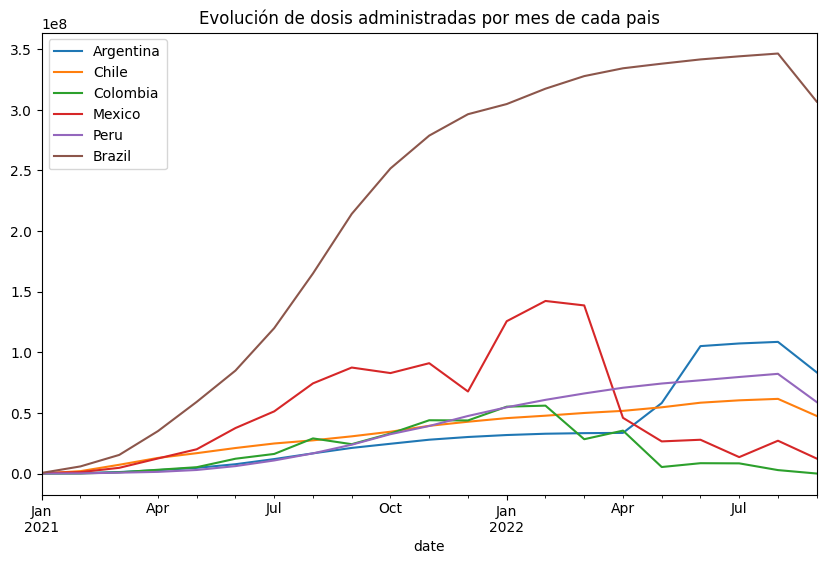

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
    
plt.title('Evolución de dosis administradas por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Si realizamos un análisis más detallado de las dosis administradas por mes en cada país, podemos observar que en algunos paises la cantidad de dosis administradas ha ido aumentando a lo largo del tiempo, sin embargo en otros paises la cantidad de dosis administradas ha ido disminuyendo, Esto puede ser debido a muchos factores, como la cantidad de vacunas disponibles, la cantidad de personas que se han vacunado, entre otros.

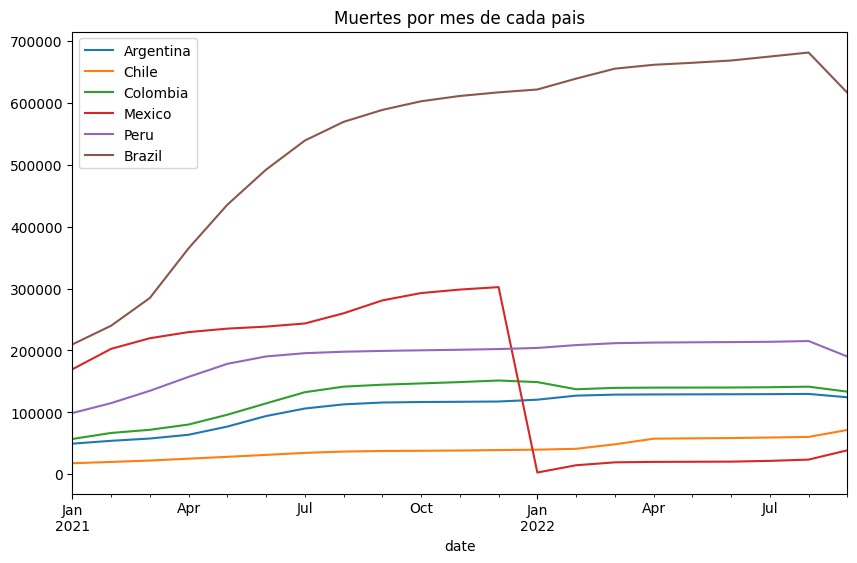

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El paía que mas muertes ha tenido es Brasil, seguido de México, Colombia, Argentina, Perú y Chile. Sin embargo, esto no quiere decir que estos paises sean los que peor han manejado la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

La disminución de casos en méxico puede ser una perdida de datos o una disminución real de casos, esto se puede analizar en un estudio posterior.

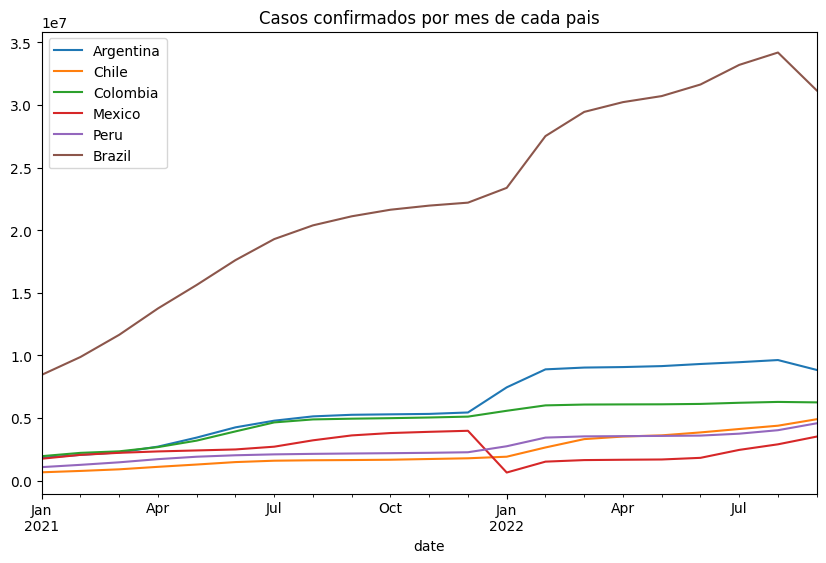

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El país que más casos confirmados ha tenido es Brasil, seguido de México, Argentina, Colombia, Chile y Perú. Esto no quiere decir que manejaran peor la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

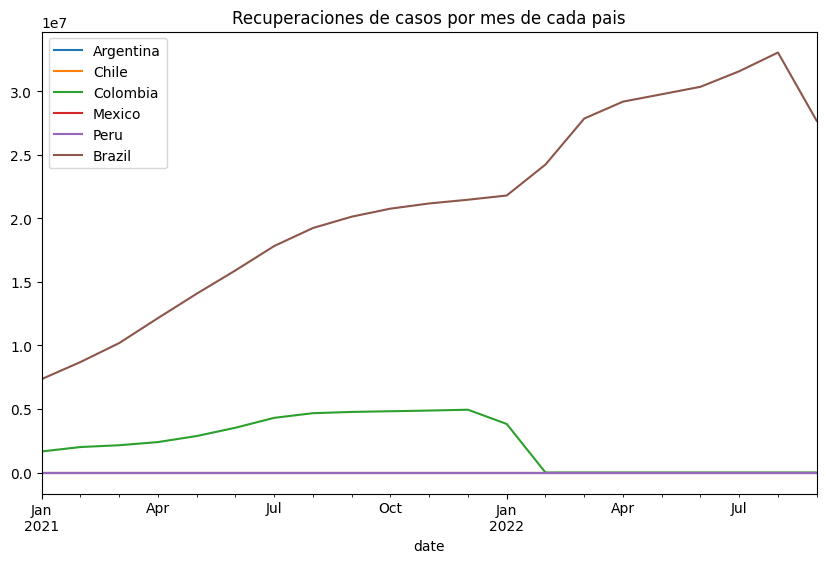

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El país que mejor se recupero ha sido Brasil, sin embargo esto como lo dijimos viene relacionado a la cantidad de personas y vacunas disponibles.

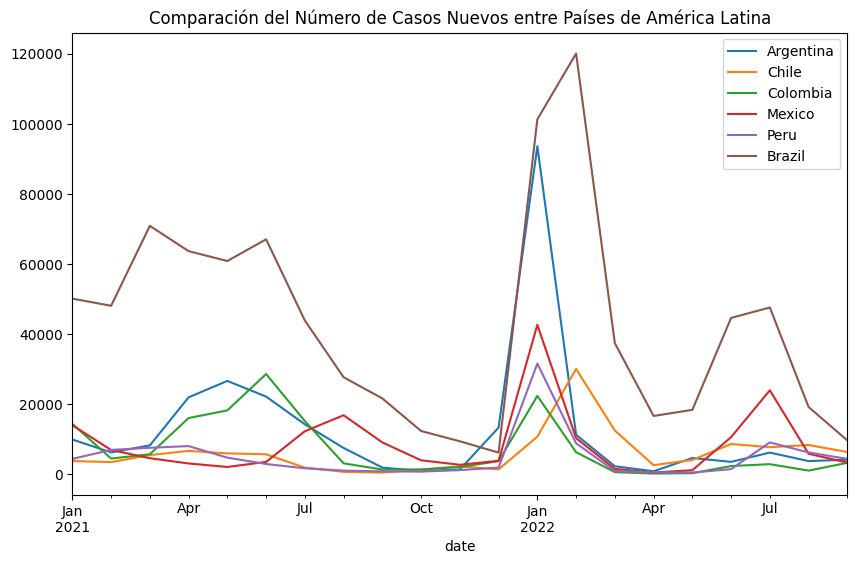

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

De los paises que mejor manejó la pandemia fue Chile, seguido de Perú, Argentina, Colombia, México y Brasil, se puede observar que la cantidad de muertes y casos confirmados es menor en estos paises ademas de no ser tan desproporcionada la cantidad de vacunas administradas.

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

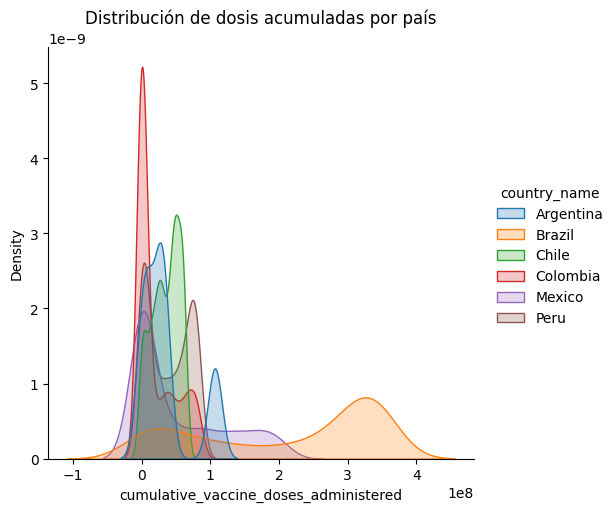

In [38]:
sns.displot(data_latinoamerica_paises, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')

De los paises que peor manejaron la pandemia fue Brasil, seguido de México, Colombia, Argentina, Perú y Chile, se puede observar que la cantidad de muertes y casos confirmados es mayor en estos paises ademas de ser desproporcionada la cantidad de vacunas administradas.

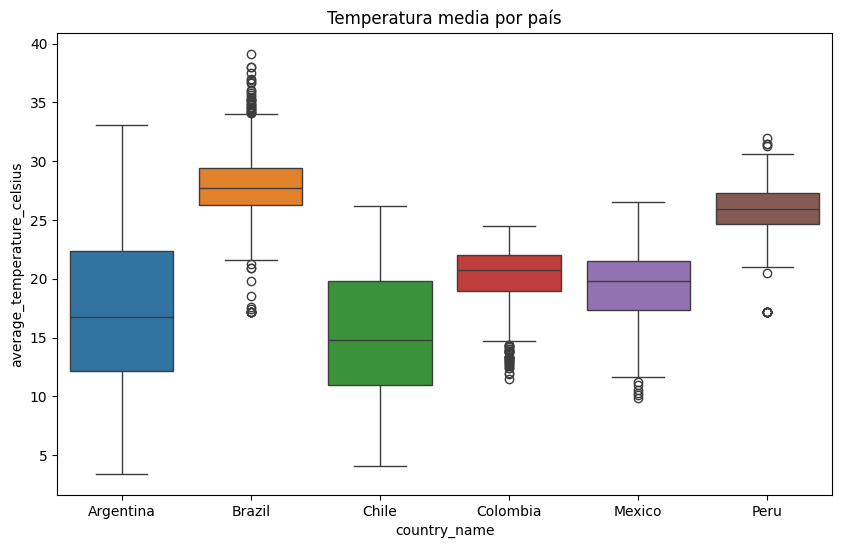

In [39]:
#average_temperature_celsius vs new_confirmed por pais boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises, hue='country_name')
plt.title('Temperatura media por país')
plt.show()

Aunque chile tiene rangos diferentes de temperatura y eso podría haber afectado la cantidad de casos confirmados y muertes, se puede observar que chile ha manejado mejor la pandemia que los demás paises.

Esto poco a poco nos ha llevado a concluir que los paises donde se podría crear los nuevos centros serían donde hay mas casos confirmados y muertes, ya que es donde se necesita más ayuda.

Pese a nuestro anterior análisis, no podemos tomar una decisión definitiva, ya que no hemos hecho un análisis detallado de los datos, por lo que se recomienda hacer un análisis más detallado y un estudio de los datos para poder tomar una decisión más acertada.
Seguiremos viendo como se comportan las variables de a traves de violinplots.

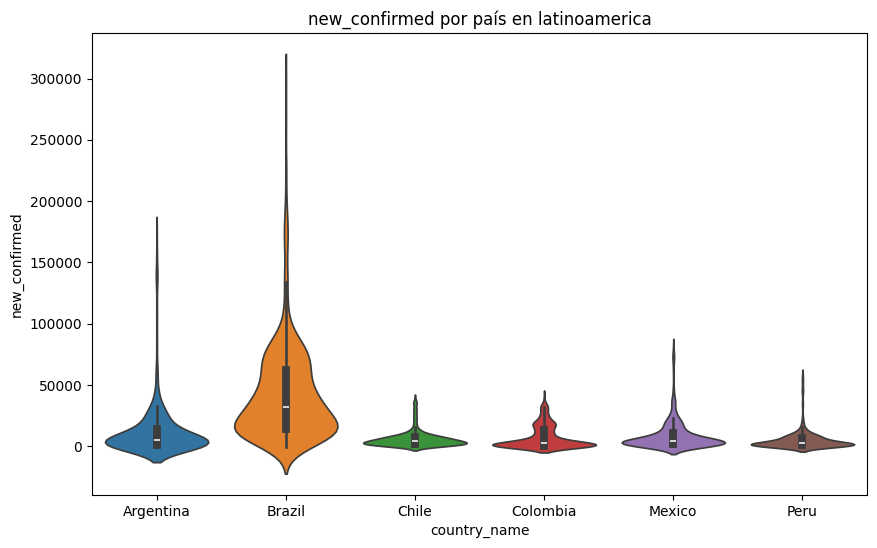

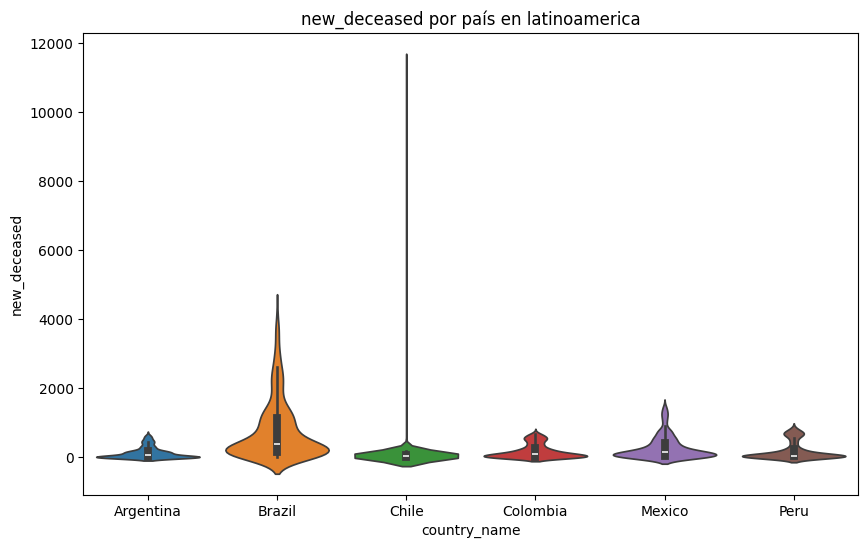

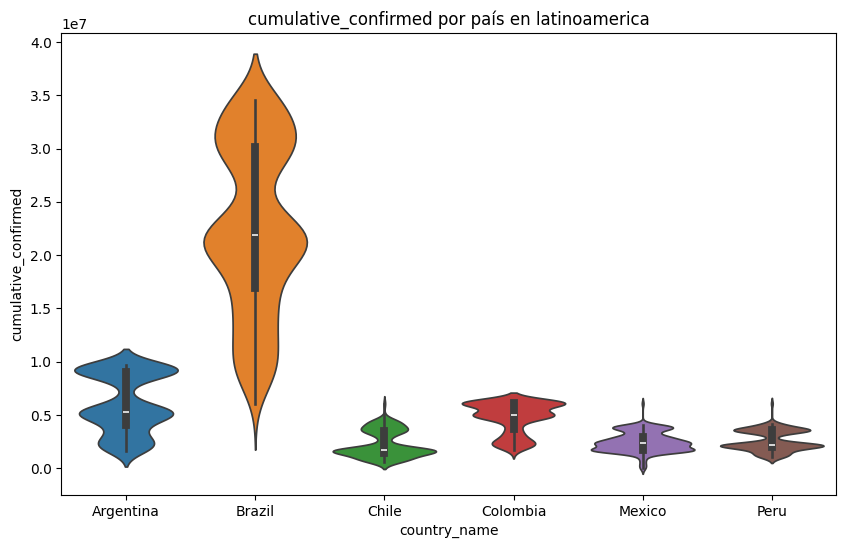

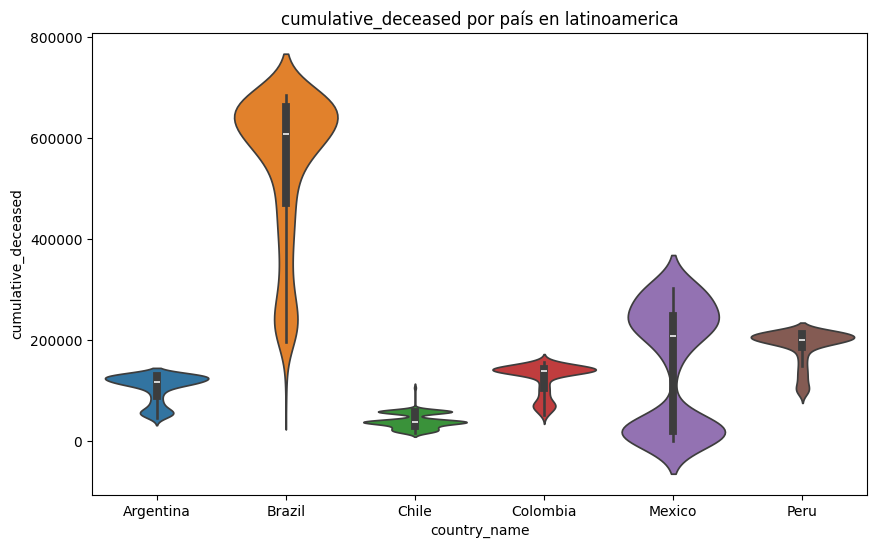

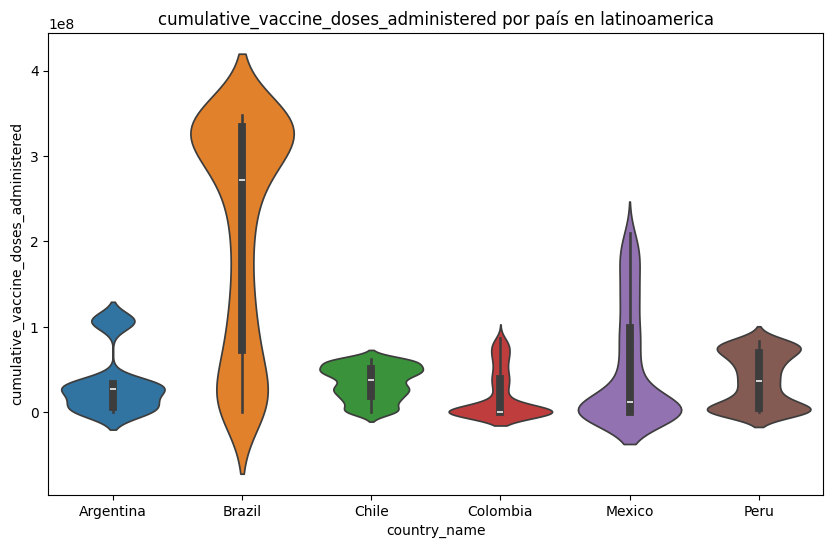

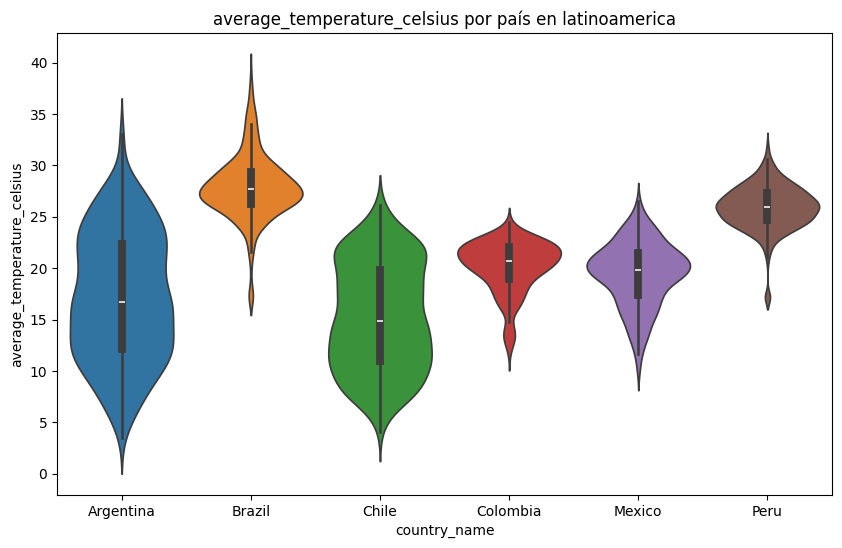

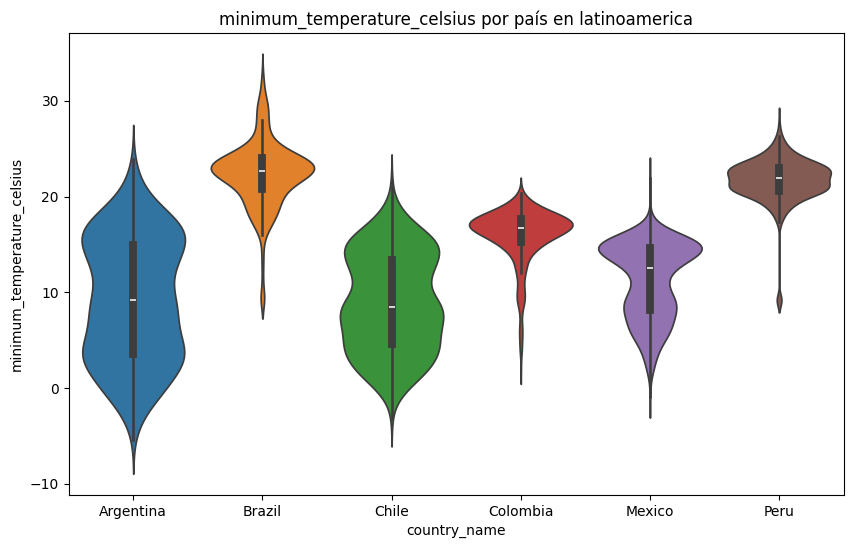

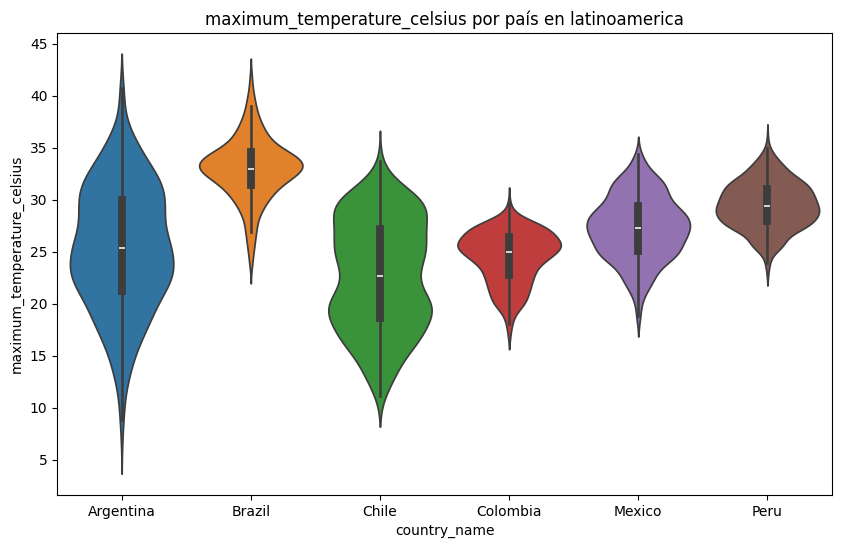

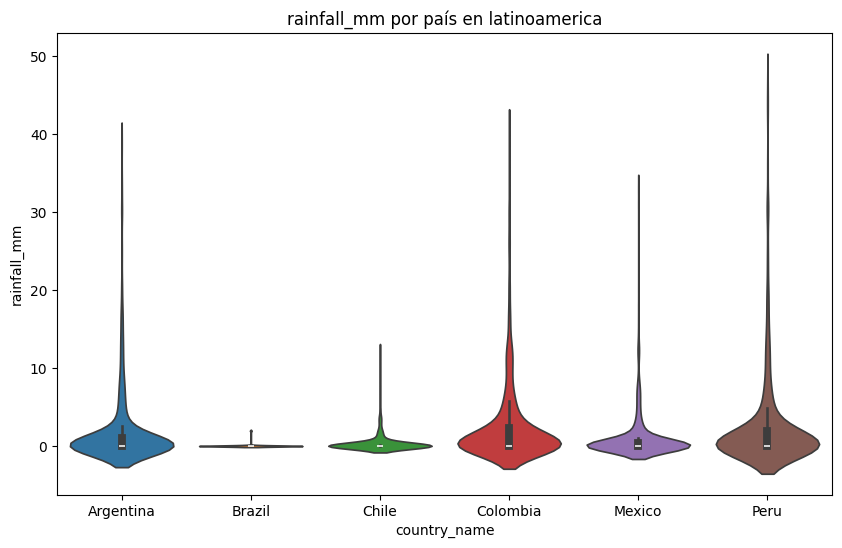

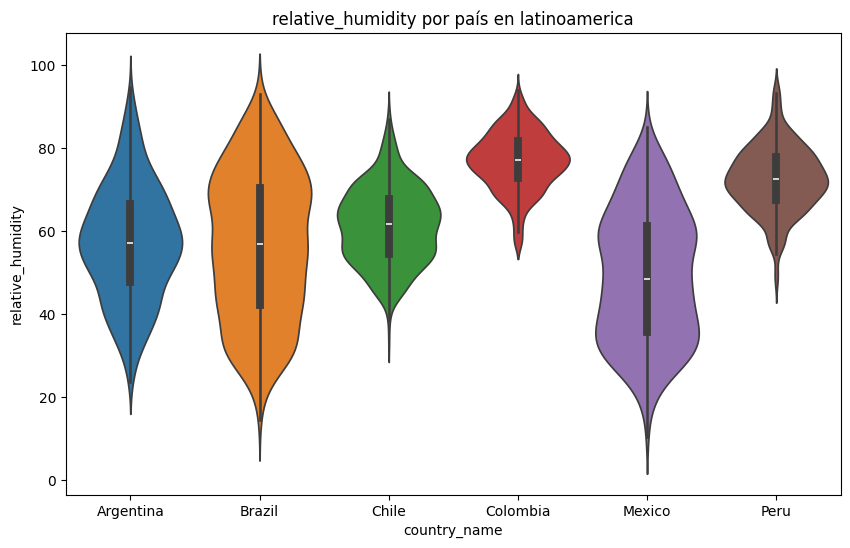

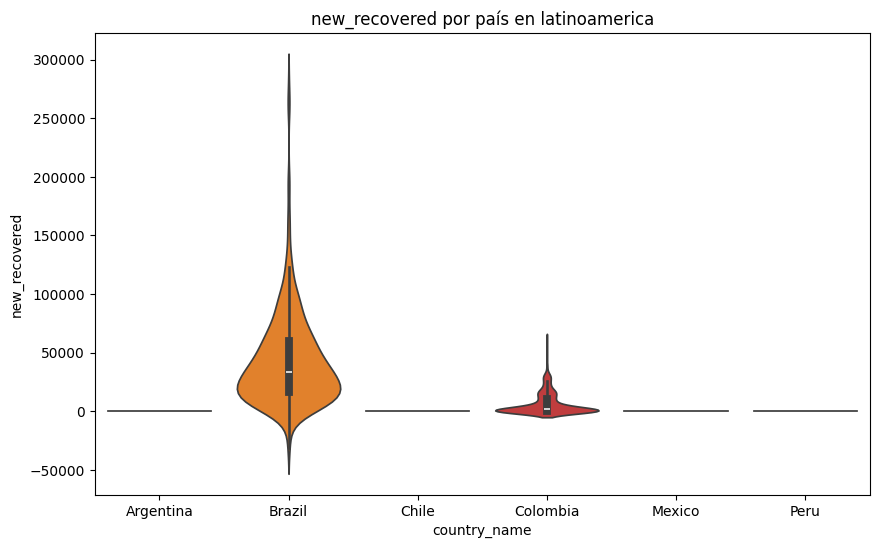

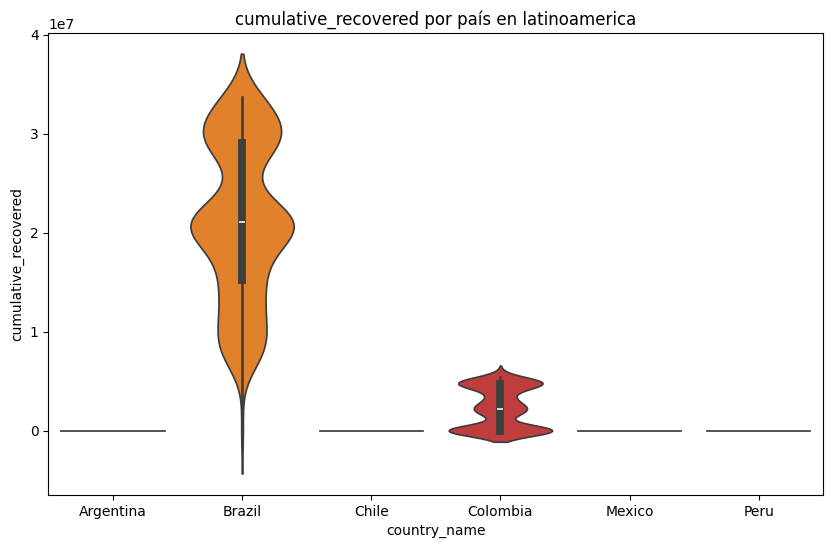

In [40]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país.
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i)
#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]


# violinplot en todos los paises para variables numericas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

Procedamos a analizar la distribución de la población por grupos de edad en los paises seleccionados, para tratar de entender como se comporta la población en cada país y en un futuro poder tomar decisiones más acertadas.

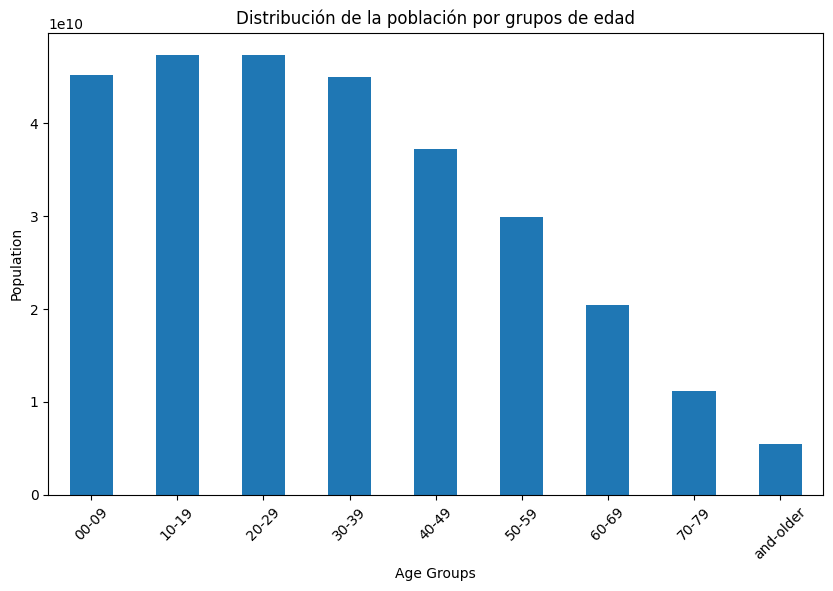

In [41]:
# Calculamos la distribucion de la poblacion por grupos de edad

age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_paises[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()

Esta gráfica es interesante porque nos permite ver la población por grupos de edad en cada país, lo que nos puede ayudar a entender cómo se comporta la población y también nos genera la idea de que podríamos graficar la cantidad de vacunas por cada grupo etario. 

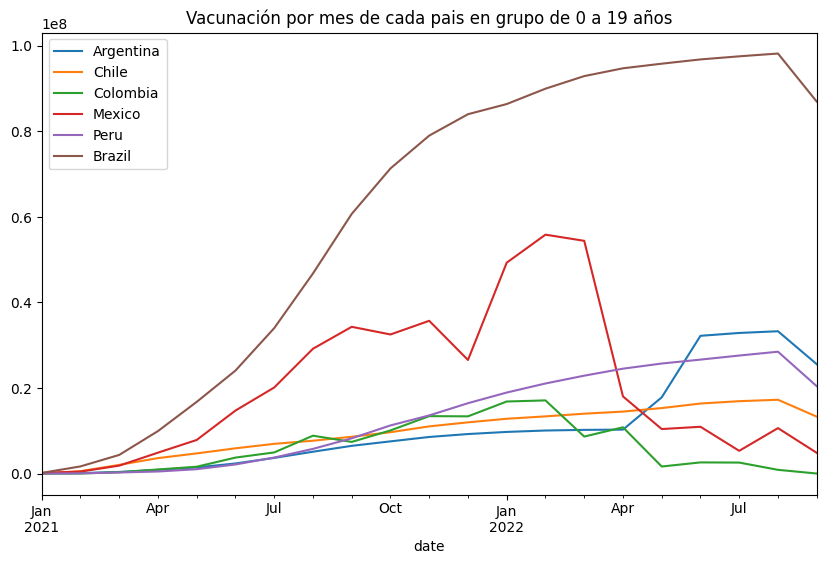

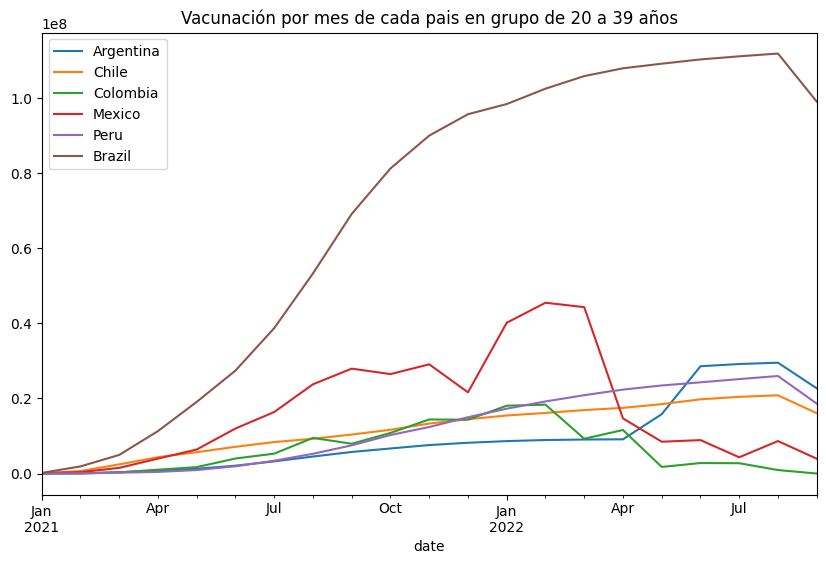

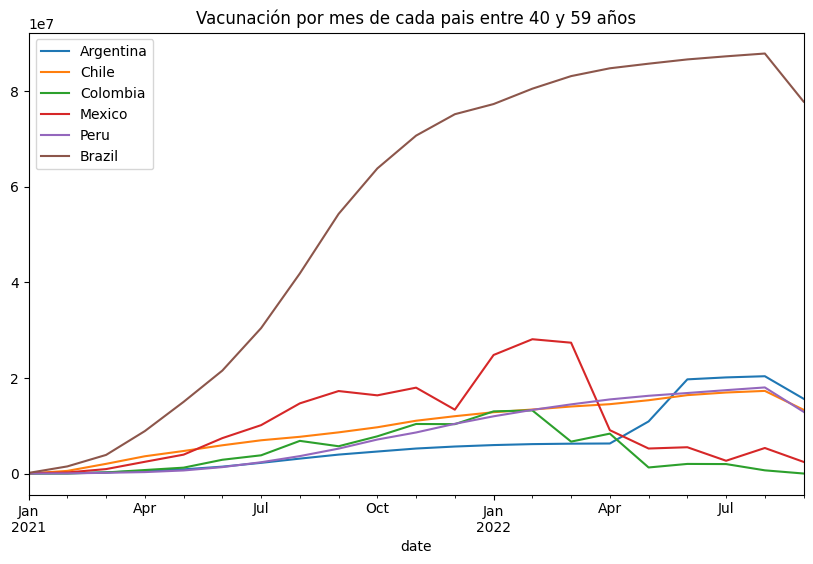

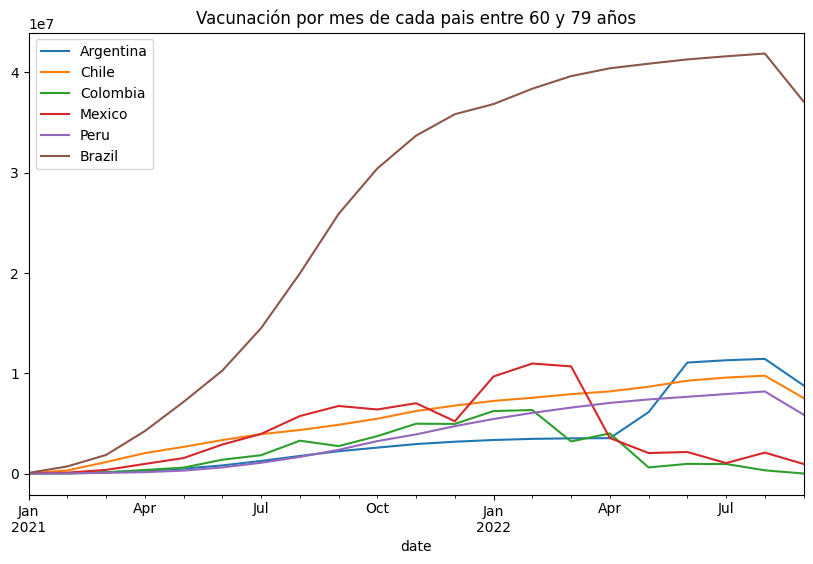

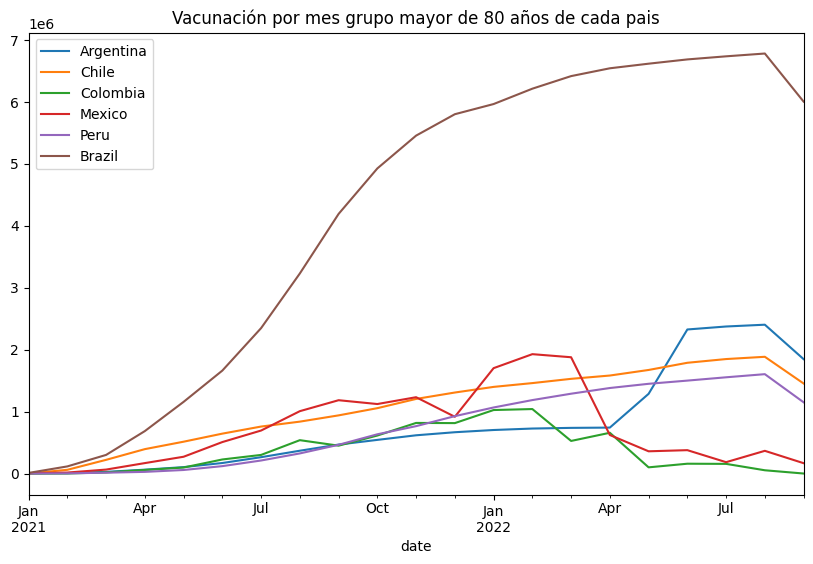

In [42]:
#grupo etareo mas vacunado
data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_20_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_40_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_60_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_39_vacunados'].sum()
data_latinoamerica_paises['population_age_40_59_vacunados'].sum()
data_latinoamerica_paises['population_age_60_79_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Revisemos la mortalidad por genero para identificar la población más vulnerable en cada país, con esto ya podriamos tener una idea de cuál serían la población a vacunar primero.

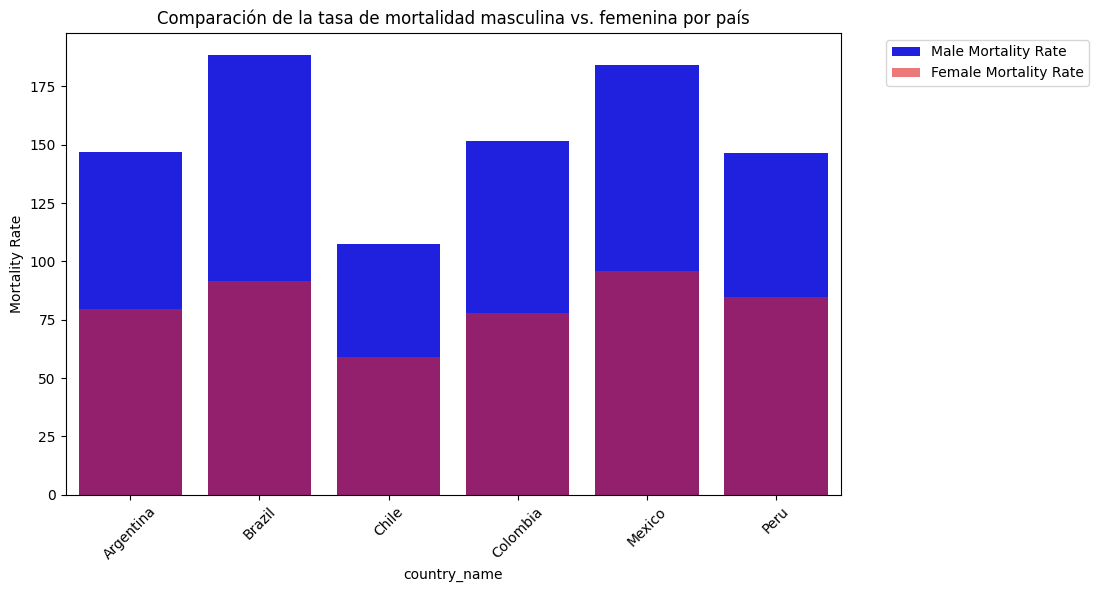

In [43]:
#grafica de mortalidad por genero

plt.figure(figsize=(10, 6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

De acuerdo a la gráfica de mortalidad, se puede observar que en todos los paises la cantidad de muertes es mayor en los hombres que en las mujeres, por lo que se podría decir que los hombres son más vulnerables a la enfermedad o están menos protegidos.

Y si vemos las enfermedades preexistentes o comorbilidades? Podríamos ver si hay alguna enfermedad que sea más común en los paises seleccionados y que haya causado más muertes.

Veamos a ver si existe de una manera mas detallada la variables y la correlación entre ellas.

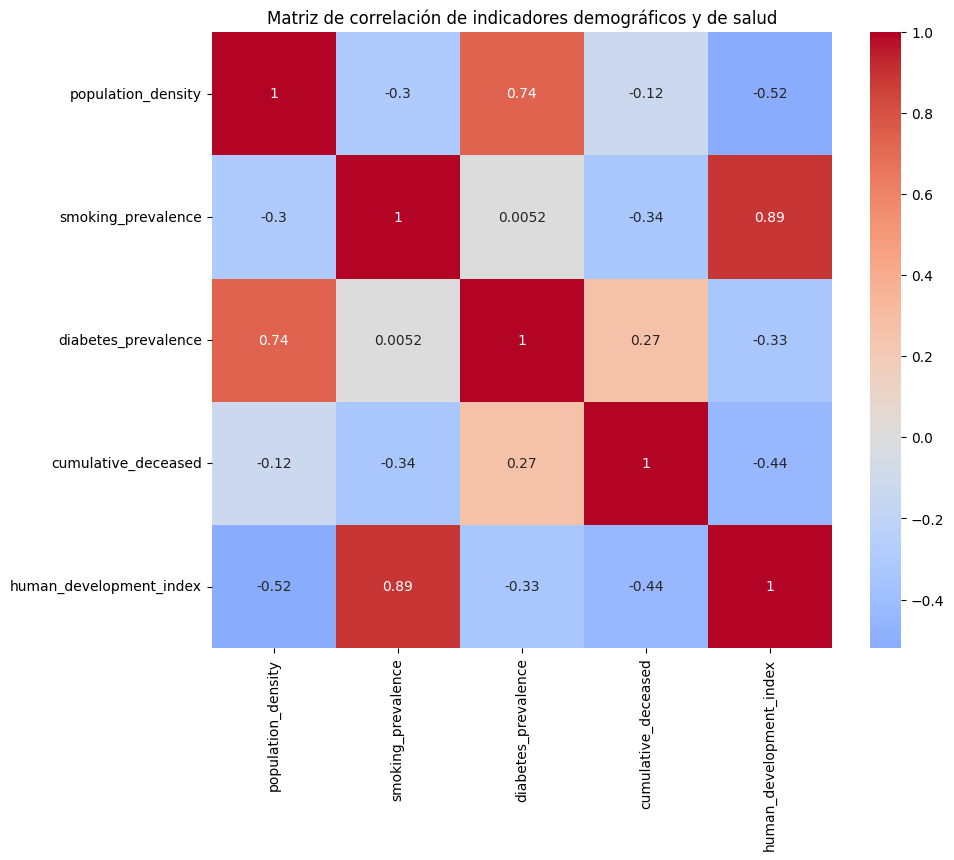

In [44]:
# Selecting a subset of columns for correlation análisis 
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data_latinoamerica_paises[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

De esta matriz podemos observar que el fumar y tener diabetes son las enfermedades preexistentes que más afectan a la población en los paises seleccionados, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados, sin embargo esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes.

De acuerdo a esto veamos se comporta la mortalidad en los paises seleccionados por enfermedades preexistentes o comorbilidades.

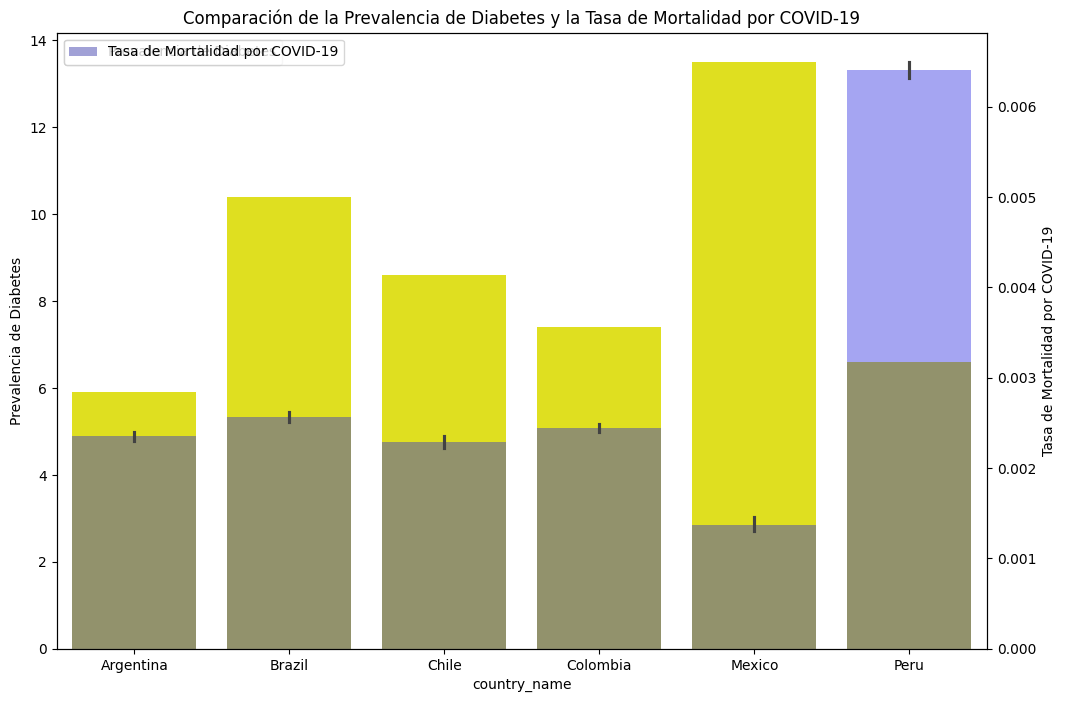

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(data=data_latinoamerica_paises, x= data_latinoamerica_paises['country_name'], y= data_latinoamerica_paises['diabetes_prevalence'], color='yellow', label='Prevalencia de Diabetes')
ax2 = ax.twinx()
sns.barplot(data=data_latinoamerica_paises, x= data_latinoamerica_paises['country_name'], y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], color='Blue', label='Tasa de Mortalidad por COVID-19', ax=ax2,
            alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.show()

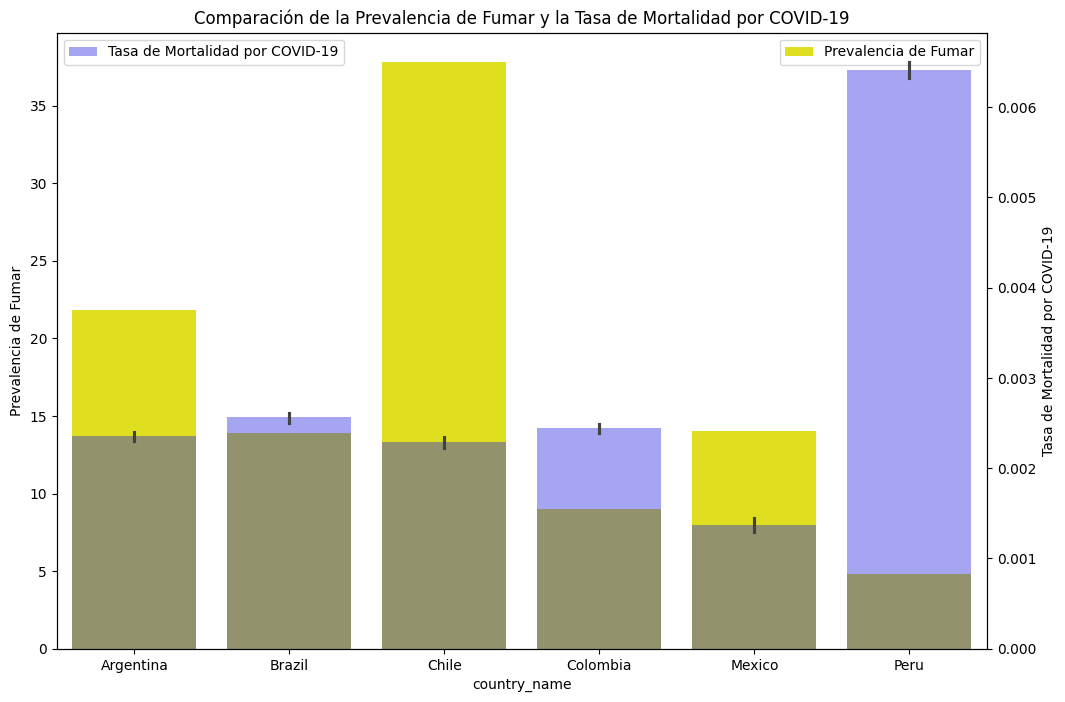

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(data=data_latinoamerica_paises, x= data_latinoamerica_paises['country_name'], y= data_latinoamerica_paises['smoking_prevalence'], color='yellow', label='Prevalencia de Fumar')
ax2 = ax.twinx()
sns.barplot(data=data_latinoamerica_paises, x= data_latinoamerica_paises['country_name'], y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], color='Blue', label='Tasa de Mortalidad por COVID-19', ax=ax2,
            alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.show()

Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, sin embargo se puede observar que la diabetes es la enfermedad que más ha causado muertes en los paises seleccionados, seguido del fumar.

Como conclusión de este avance podemos decir que los paises que más necesitan ayuda son Brasil, México y Colombia, ya que son los paises que más casos confirmados y muertes han tenido, además de ser los paises que menos vacunas han administrado.

Las enfermedades preexistentes que más han afectado a la población en los paises seleccionados son el fumar y la diabetes, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados (Aclarar que esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes y de las que tenemos datos).

### Avance 3

Como primera aproximación vamos a realizar un análisis del comportamiento de manera semanal y anual, para esto vamos a agrupar los datos por semana y por año. Para que recordemos como usar groupby.

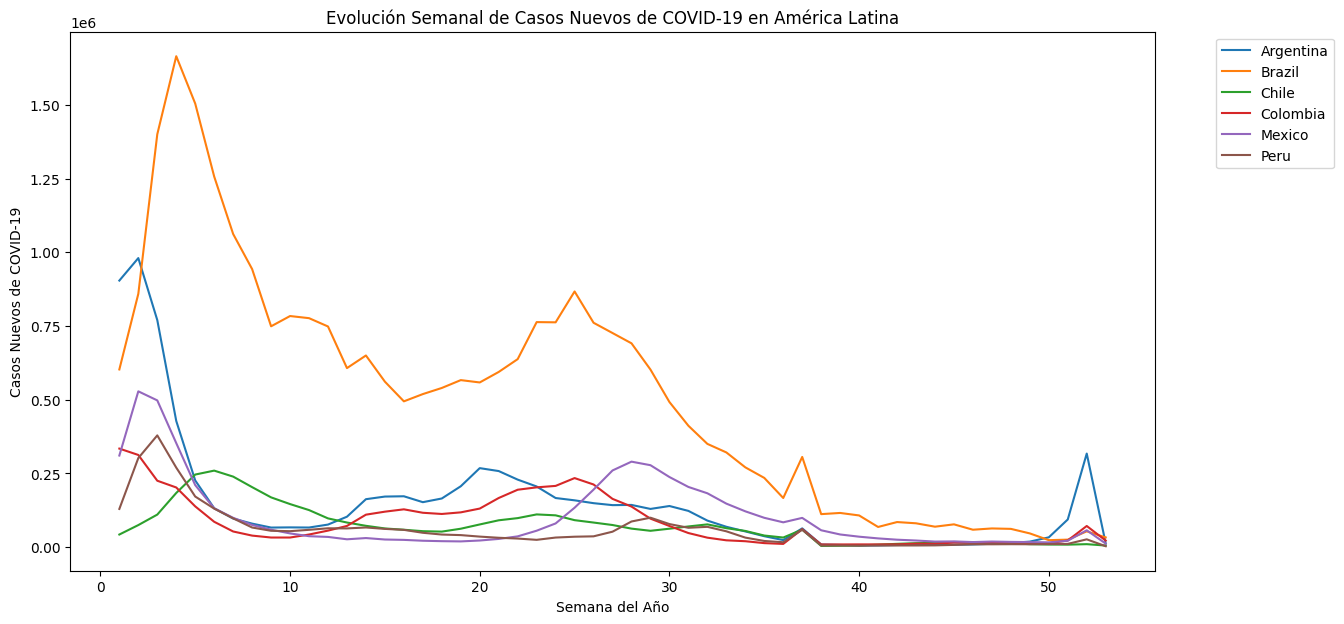

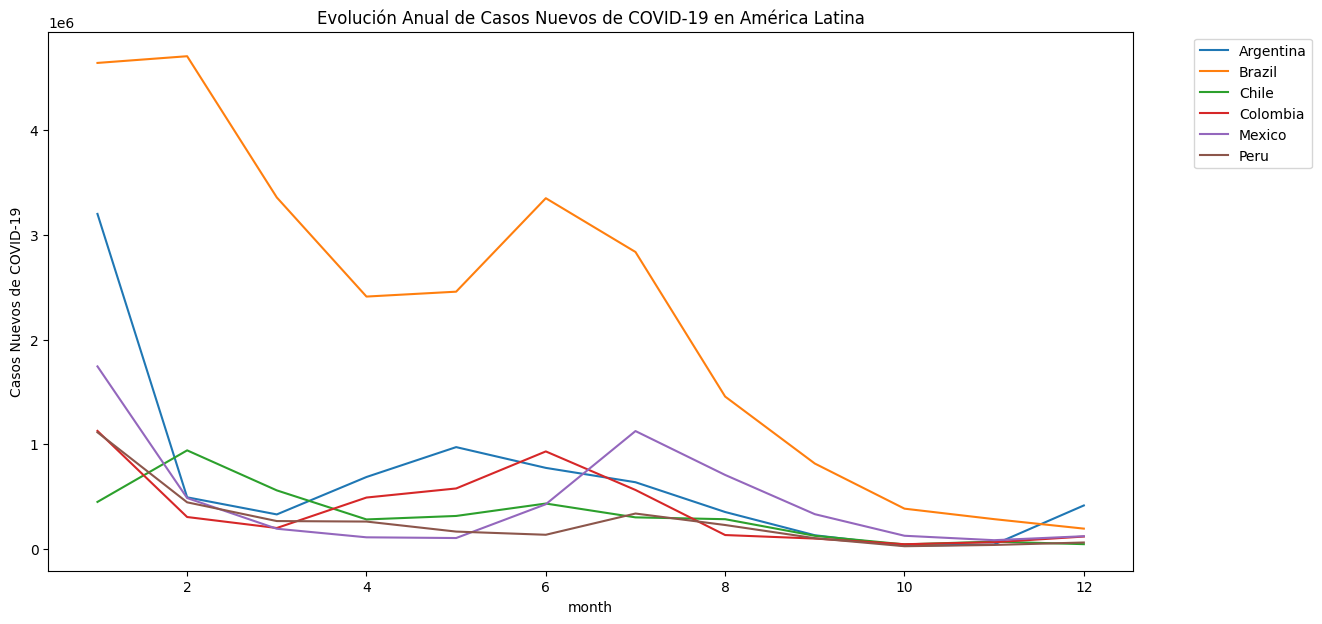

In [47]:
#Vamos a analizar como evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana

data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week
weekly_cases = data_latinoamerica_paises.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=country)

plt.xlabel('Semana del Año')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Semanal de Casos Nuevos de COVID-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#ahora por vamos por año
data_latinoamerica_paises['month'] = data_latinoamerica_paises.index.month
yearly_cases = data_latinoamerica_paises.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    plt.plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=country)

plt.xlabel('month')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Anual de Casos Nuevos de COVID-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

De la anterior gráfica se puede observar que la cantidad de casos confirmados y muertes ha ido disminuyendo a lo largo del tiempo, sin embargo esto no quiere decir que la pandemia haya terminado, ya que la cantidad de casos confirmados y muertes sigue siendo alta, ademas se nota un pico en la fechas finales.

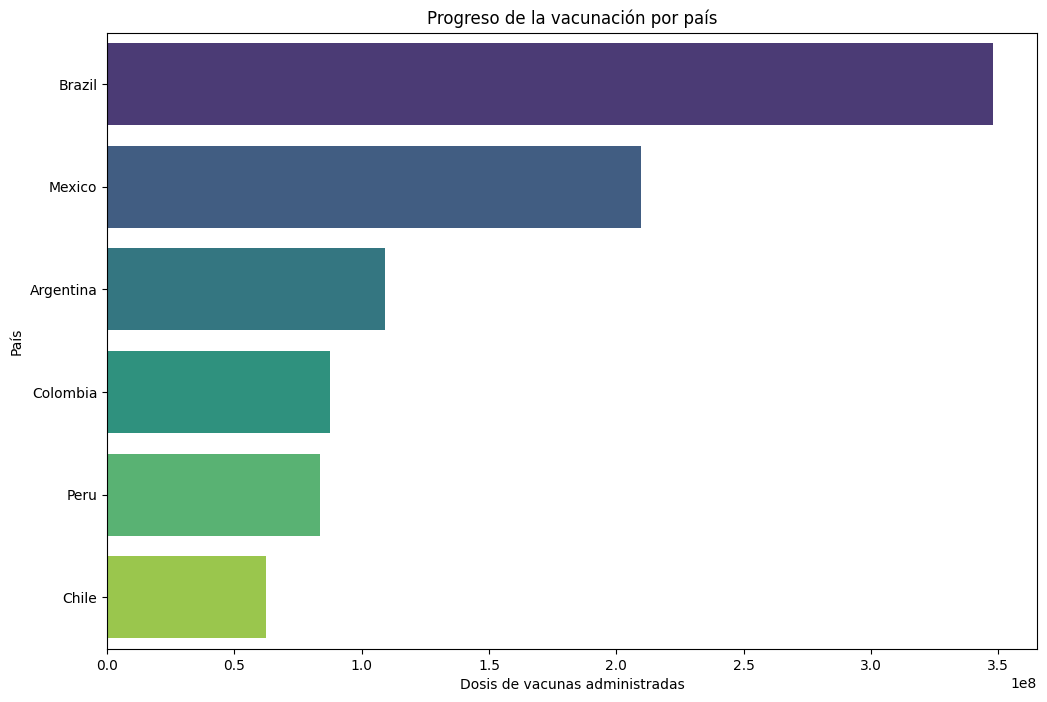

In [48]:
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index,hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()

El país con mayor dosis administradas es Brasil, seguido de México, Argentina, Colombia, Chile y Perú. Se contradice con los hallazgos anteriores sin embargo recordemos que se debe tener en cuenta la población de cada país y la cantidad de vacunas disponibles.

y la temperatura cómo se comporta en los paises seleccionados?

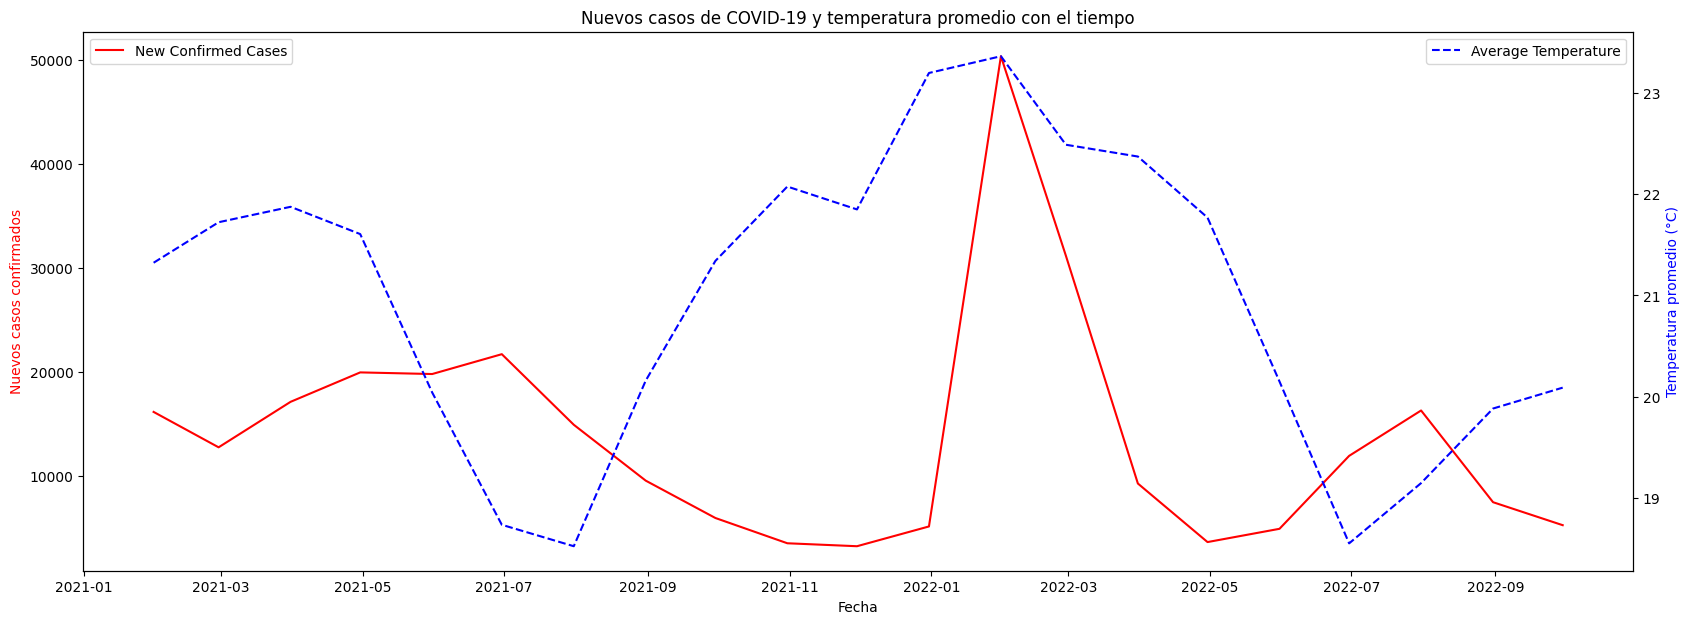

In [106]:
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

plt.figure(figsize=(20, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(data_latinoamerica_paises_Fecha.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises_Fecha.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmed Cases')
ax2.plot(data_latinoamerica_paises_Fecha.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises_Fecha.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio (°C)', color='blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Podemos observar que la temperatura promedio ha ido aumentando y los casos confirmados han ido disminuyendo sin embargo hubo un pico antes del mes de marzo pero disminuyó rápidamente, esto puede ser por la cantidad de vacunas administradas o por la cantidad de personas que se han vacunado.

Cada país tiene un impacto debido a la urbanización y la densidad de población, por lo que vamos a analizar la densidad de población en cada país.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17752\3589044136.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='viridis')


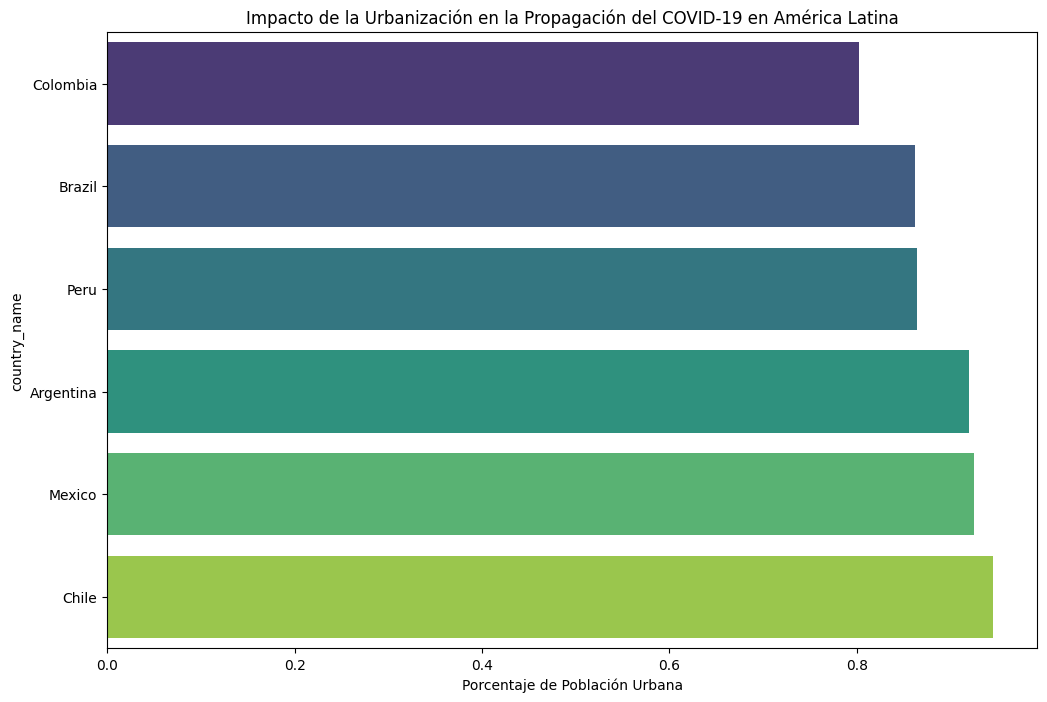

In [55]:
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(12, 8))
sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='viridis')
plt.xlabel('Porcentaje de Población Urbana')
plt.title('Impacto de la Urbanización en la Propagación del COVID-19 en América Latina')
plt.show()

El pais con mayor impacto en la propagación fue chile, aunque es extraño ya que chile fue uno de los paises que mejor manejó la pandemia, sin embargo esto puede ser debido a la densidad de población en chile.

Y la densidad de población por grupos de edad?

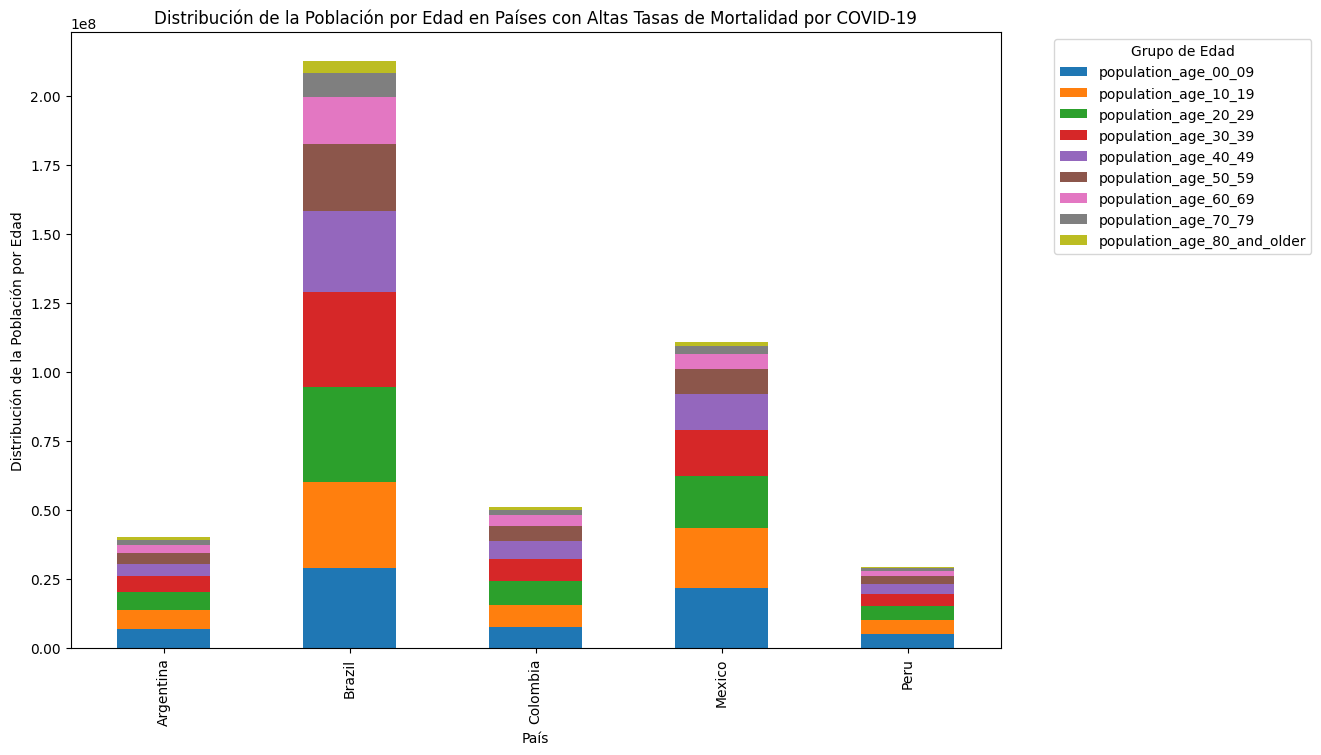

In [56]:
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()

age_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('País')
plt.ylabel('Distribución de la Población por Edad')
plt.title('Distribución de la Población por Edad en Países con Altas Tasas de Mortalidad por COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Grupo de Edad')
plt.show()

El gráfico muestra claramente la desigualdad en cantidades de población por grupos de edad en los paises seleccionados aunque no proporcione muchas cosas interesantes. Es bueno tenerlo en cuenta para futuros análisis.

Sin embargo podemos empezar a ver como fueron de buenas o malas las estrategias de vacunación para mitigar la mortalidad y los casos confirmados.

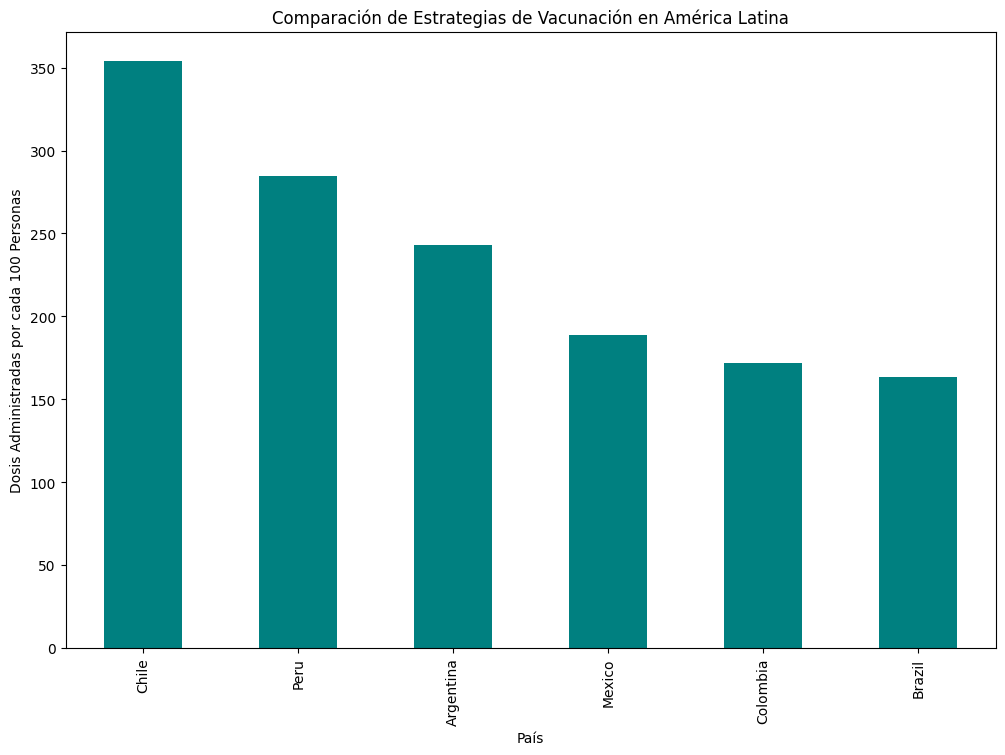

In [57]:
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean() * 100
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal')
plt.xlabel('País')
plt.ylabel('Dosis Administradas por cada 100 Personas')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

Nuevamente vemos el buen resultado de las politicas de chile y un clara falla en Colombia y Brasil.

Con esto vamos definiendo los paises que necesitan más ayuda y donde se deberían crear los nuevos centros.

Anterioremente revisamos las diabeter pero seria bueno revisarlo en porcentajes para identificar paises.

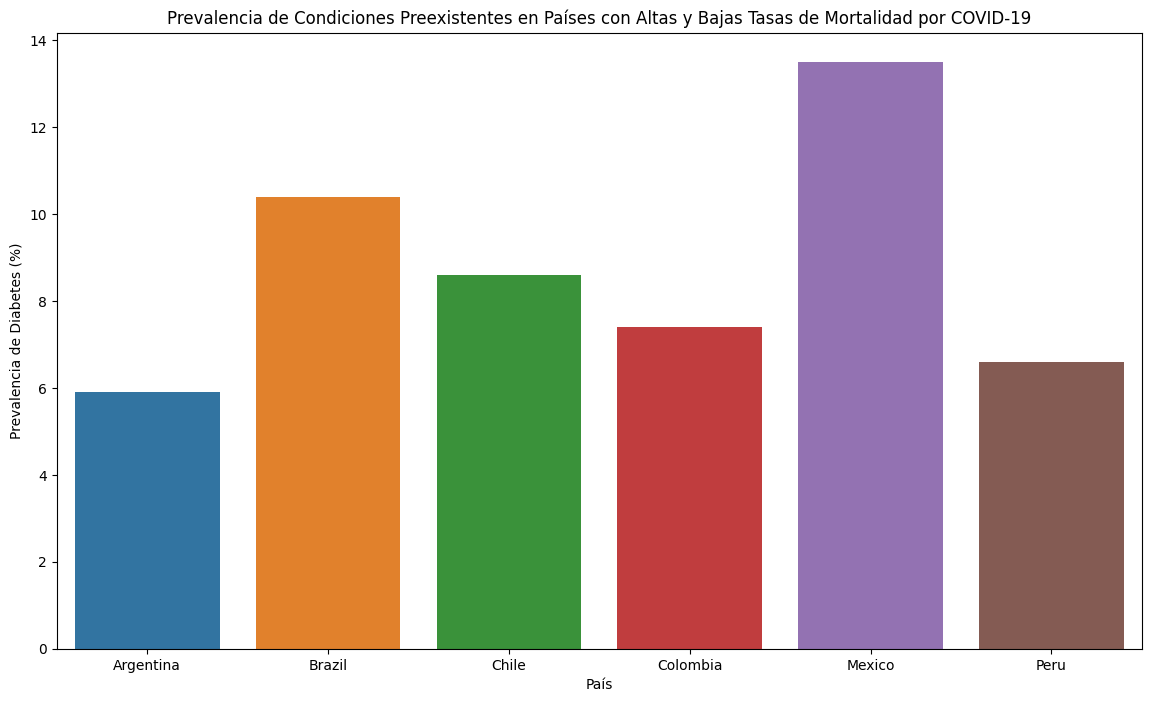

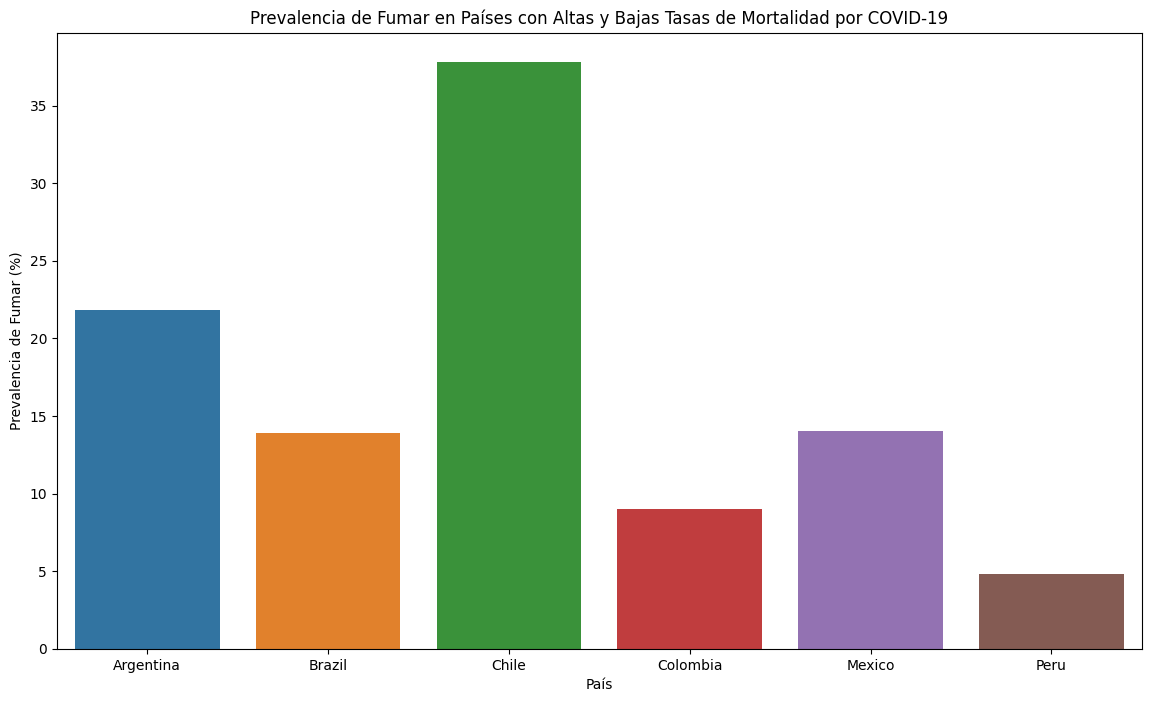

In [58]:
# Prevalencia de diabetes.
top_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
conditions_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries.union(bottom_countries))]
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Diabetes (%)')
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

# Prevalencia de fumar.
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

Ahora identificamos que la diabetes afecta mucho mas a México y Brasil, por lo que se podría decir que estos paises son los que más han sufrido por la diabetes. Respecto a fumar se puede observar que afecta más a Chile y Argentina, por lo que se podría decir que estos paises son los que más han sufrido por el fumar.

Y viendo todo esto, ¿cómo se ha visto la fatalidad por país?

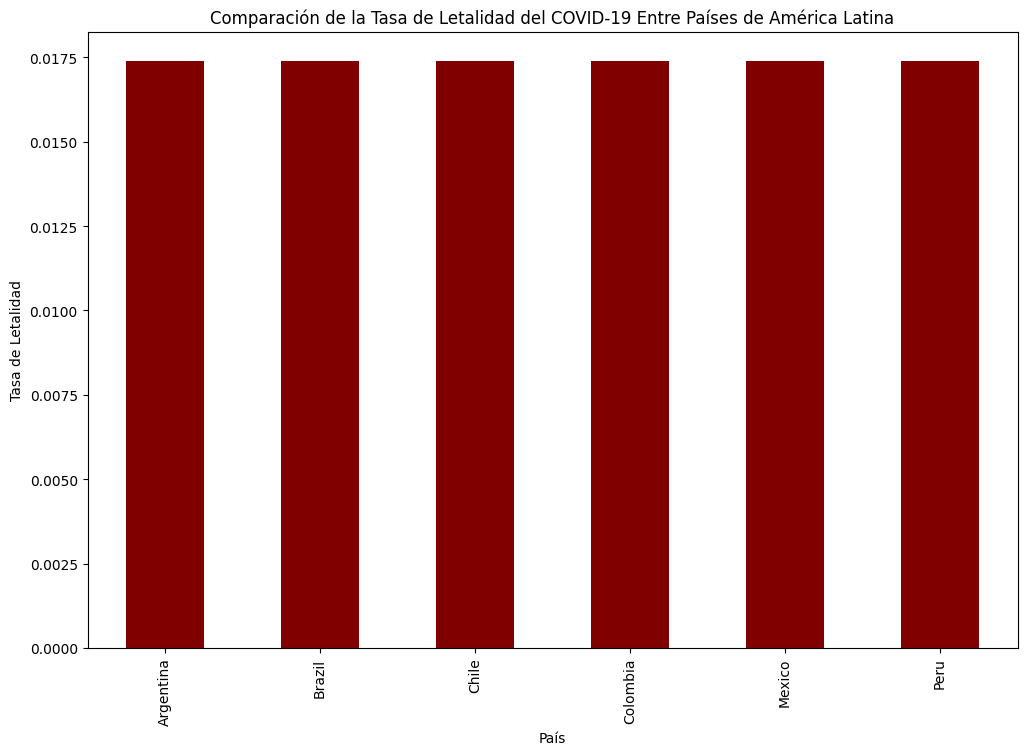

In [59]:
#  Fatalidad por pais

data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

Todos los países han tenido un comportamiento similar en cuanto a la fatalidad, sin embargo apoyandose con las otras gráficas se puede observar que ha disminuido.

Los casos nuevos y las muestes nuevas ha variado de la siguiente manera esto debido a la vacucación y a las medidas tomadas por los paises, ademas de que se ha disminuido la cantidad de personas que se han contagiado y fallecido.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17752\671850016.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_latinoamerica_paises.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17752\671850016.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_latinoamerica_paises.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


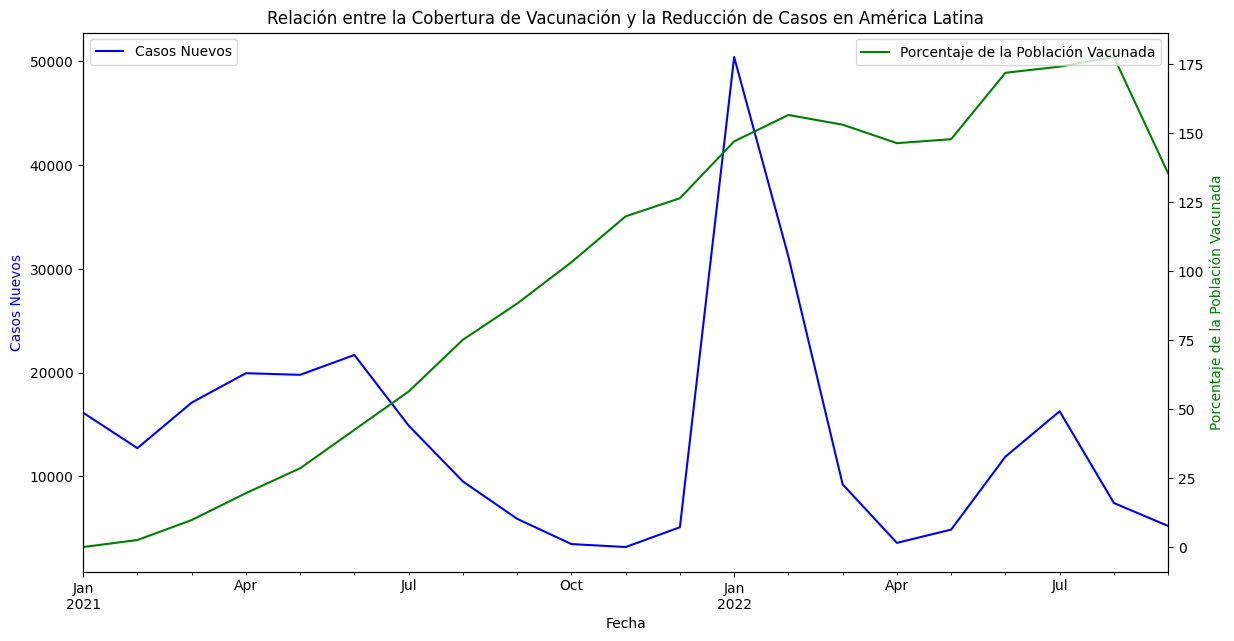

In [60]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
data_latinoamerica_paises['percentage_vaccinated'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'] * 100
data_latinoamerica_paises.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17752\2015190539.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_latinoamerica_paises, x='date', y='mortality_rate', estimator='mean', ci=None)


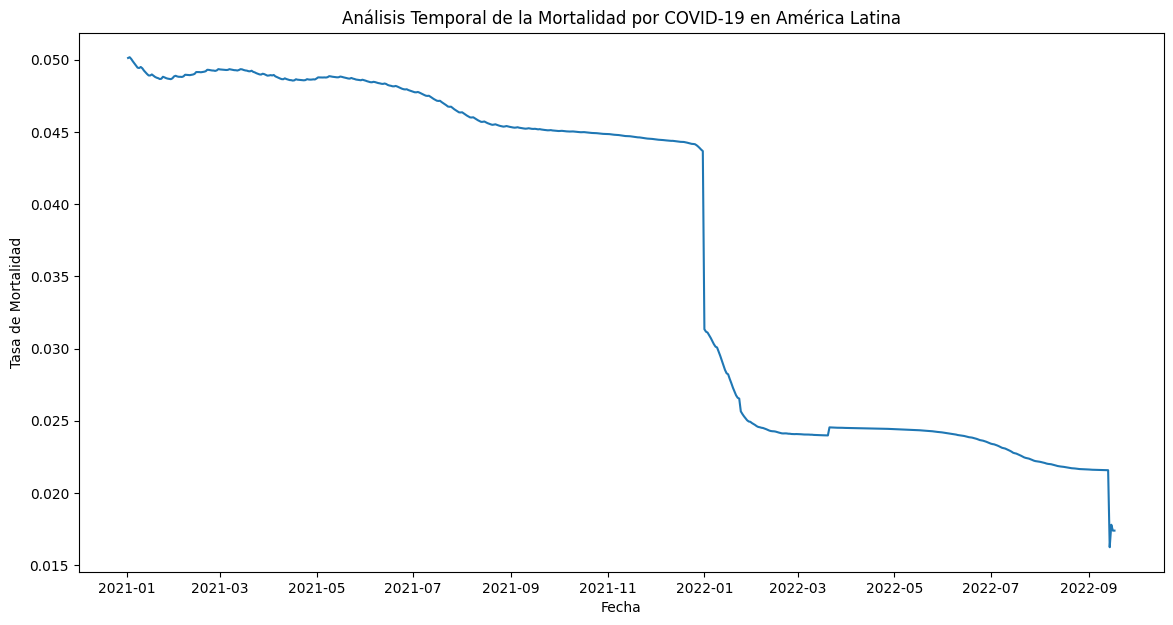

In [61]:
# cómo evolucionó la mortalidad

data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises, x='date', y='mortality_rate', estimator='mean', ci=None)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

Y finalmente los casos activos han disminuido y los casos recuperados han aumentado, esto debido a la vacunación y a las medidas tomadas por los paises.

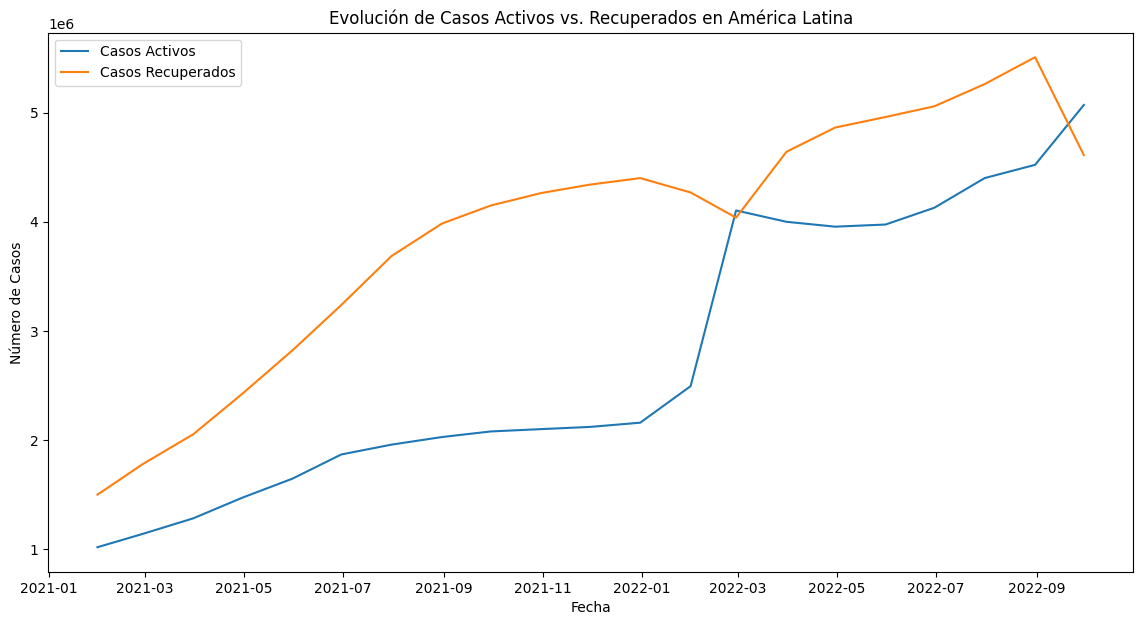

In [62]:
#como evolucionan los casos activos y recuperados en América Latina
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

Ya para finalizar todo está es la situación actual de los paises seleccionados en la idea de expansión, puede parecer un poco extraño sin embargo debemos recordar que es por nuestro conjunto de datos.

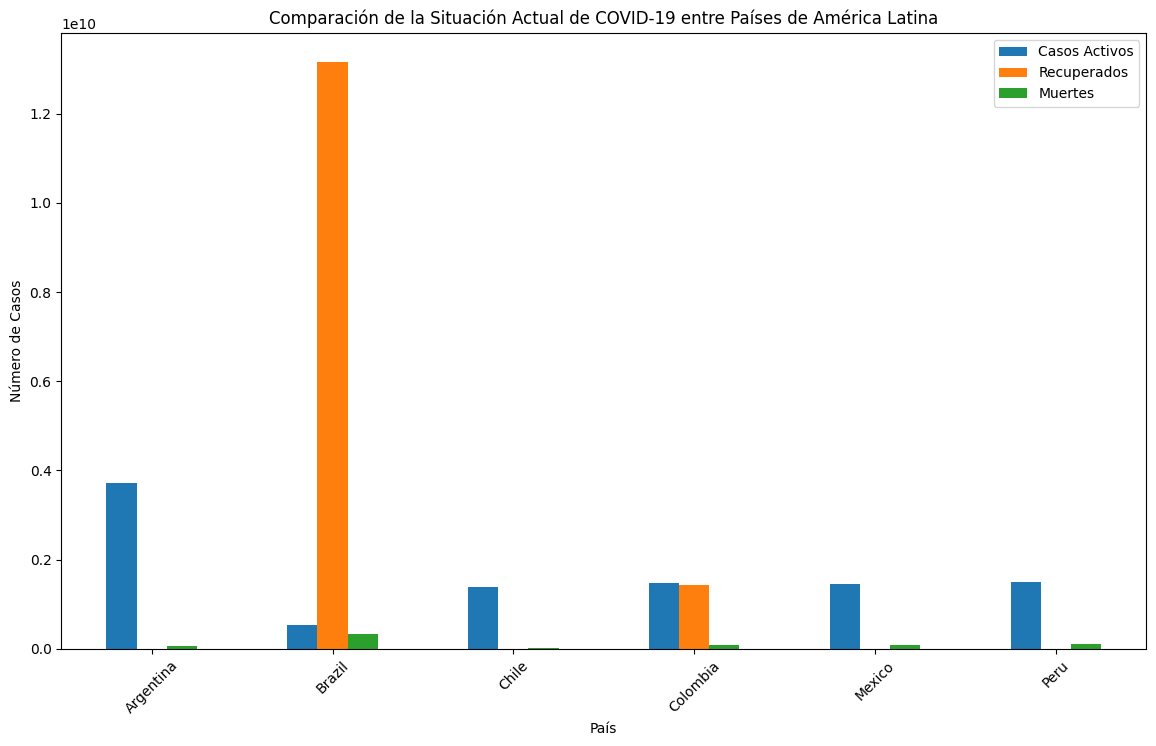

In [63]:
# No se tienen dato pero hay datos de recuperados y muertes en algunos paises
current_situation = data_latinoamerica_paises.groupby('country_name').sum()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

Por lo tanto los paises donde debe expandirse la empresa farmaceutica son Brasil, México y Colombia, ya que son los paises que más casos confirmados y muertes han tenido, además de ser los paises que menos vacunas han administrado, tal vez las politicas de vacunación no han sido las mejores o no han tenido la cantidad de vacunas necesarias, esto sin tener en cuenta la densidad de población y la cantidad de habitantes de cada país y problemas sociales y económicos que puedan afectar la cantidad de casos confirmados y muertes.

### EXTRA CREDIT

Para tener un mejor contexto graficamos la cantidad de vacunas administradas,los casos confirmados, muertes y recuperados.

In [50]:
# mapa para ver la distribución de casos confirmado, muertes, vacuna y recuperados
import folium
from folium.plugins import HeatMap

# Seleccionamos las columnas que vamos a utilizar
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_latinoamerica_paises[columns].dropna()

# Creamos un mapa centrado en América Latina
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Creamos un mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

# Creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

# Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

# Creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map

No se ve muy detallado en las anteriores gráficas, por lo que vamos a realizar un análisis más detallado de las dosis administradas, casos confirmados, muertes y recuperados en cada país pero con gráficos mas básicos manteniendo los mapas.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17752\3163959623.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


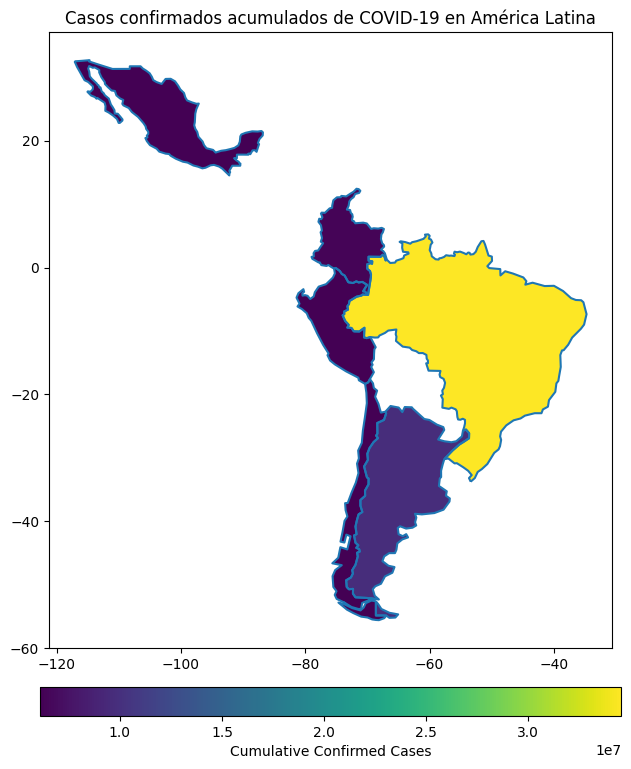

In [52]:
# mapa para ver la distribución de casos confirmados en latinoamerica por país
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world = world[(world.name=="Argentina") | (world.name=="Chile") | (world.name=="Colombia") | (world.name=="Mexico") | (world.name=="Peru") | (world.name=="Brazil")]
world = world.rename(columns={"name":"country_name"})
world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_confirmed'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_confirmed', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17752\1917246918.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


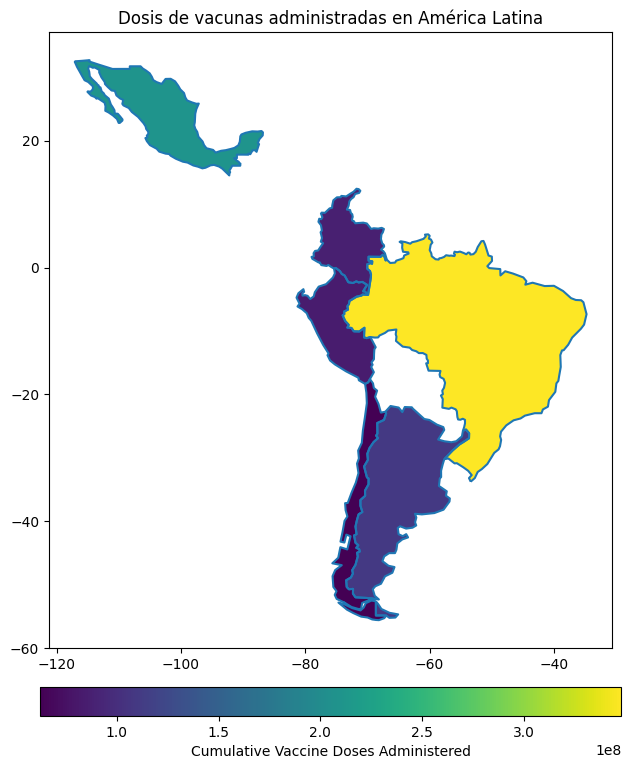

In [53]:
# mapa para ver la distribución de vacunados en latinoamerica por país
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world = world[(world.name=="Argentina") | (world.name=="Chile") | (world.name=="Colombia") | (world.name=="Mexico") | (world.name=="Peru") | (world.name=="Brazil")]
world = world.rename(columns={"name":"country_name"})
world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_vaccine_doses_administered', ax=ax, legend=True, legend_kwds={'label': "Cumulative Vaccine Doses Administered", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Dosis de vacunas administradas en América Latina')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17752\3159334340.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


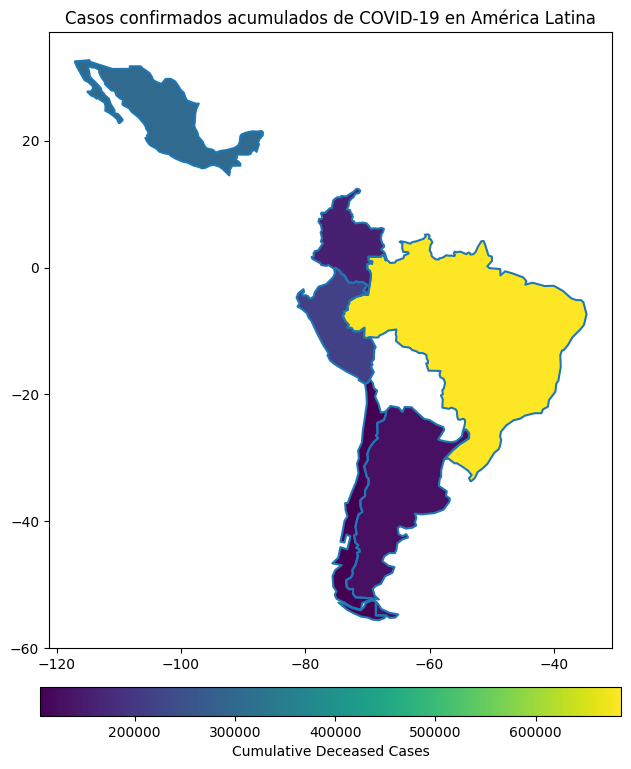

In [54]:
# mapa para ver la distribución muertes en latinoamerica por país
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world = world[(world.name=="Argentina") | (world.name=="Chile") | (world.name=="Colombia") | (world.name=="Mexico") | (world.name=="Peru") | (world.name=="Brazil")]
world = world.rename(columns={"name":"country_name"})
world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_deceased', ax=ax, legend=True, legend_kwds={'label': "Cumulative Deceased Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()